

---



## **FINAL PROJECT** -- EXPLORATORY DATA ANALYSIS (EDA) -- IT462 -- GROUP 9

# **MEMBERS:**

# **STUDENT ID** - 202103045

# **NAME** - YASH MASHRU

# **STUDENT ID** - 202103054

# **NAME** - SANCHIT SATIJA

# **STUDENT ID** - 202103007

# **NAME** - KEERTIVARDHAN GOYAL



---



# Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as msno
import seaborn as sns
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_regression,SelectKBest,SelectPercentile,VarianceThreshold



---



# Dataset Loading

In [4]:
df = pd.read_csv('Athletic_Facilities_Test.csv')

In [5]:
print(df)

      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
0          False           False           False           False       False   
1          False           False           False           False       False   
2          False           False           False           False       False   
3          False           False           False           False       False   
4          False           False           False           False       False   
...          ...             ...             ...             ...         ...   
6892       False           False            True            True       False   
6893       False           False           False           False       False   
6894       False           False            True           False       False   
6895       False           False           False           False       False   
6896       False           False           False            True       False   

      BOCCE BOROUGH  COMMUNITYBOARD  CO



---



# Data Preprocessing

In [6]:
df.shape

(6897, 44)

In [7]:
df.sample(n=10)

ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
0          False           False           False           False       False   
4341       False           False           False           False        True   
4597       False           False           False           False       False   
2365       False           False           False           False       False   
4310       False           False           False           False        True   
3976       False           False           False           False        True   
6274       False           False           False           False       False   
4655       False           False           False           False       False   
1756       False           False           False           False       False   
2100       False           False           False           False        True   

      BOCCE BOROUGH  COMMUNITYBOARD  COUNCILDISTRICT  CRICKET  ...  \
0     False       Q             411               19    False  ...   
4341  False       Q             407               20    False  ...   
4597  False       Q             404               21    False  ...   
2365  False       X             208               11    False  ...   
4310  False       M             107                6    False  ...   
3976  False       B             315               48    False  ...   
6274  False       Q             405               37    False  ...   
4655  False       B             315               47    False  ...   
1756  False       Q             481               21    False  ...   
2100  False       M             103                2    False  ...   

         STLength SURFACE_TYPE                SYSTEM  TENNIS TRACK_AND_FIELD  \
0      226.402042      Asphalt    Q012-ZN03-TENNIS-3    True           False   
4341   156.133574      Asphalt     Q211-BASKETBALL-1   False           False   
4597   225.807694      Asphalt     Q450-VOLLEYBALL-3   False           False   
2365   128.596259      Asphalt      X150J-HANDBALL-4   False           False   
4310   125.437201      Asphalt     M219-BASKETBALL-3   False           False   
3976   257.168967      Asphalt     B109-BASKETBALL-1   False           False   
6274   147.877605      Asphalt  Q020-ZN04-HANDBALL-1   False           False   
4655   226.083073      Asphalt         B244-TENNIS-7    True           False   
1756  1047.609402    Synthetic    Q099-ZN09-SOCCER-2   False           False   
2100   274.236814      Asphalt  M144-01-BASKETBALL-2   False           False   

     T_BALL  VOLLEYBALL WHEELCHAIRFOOTBALL  YOUTH_FOOTBALL  ZIPCODE  
0     False       False              False           False  11361.0  
4341  False       False              False           False  11355.0  
4597  False        True              False           False  11368.0  
2365  False       False              False           False  10463.0  
4310  False       False              False           False  10024.0  
3976  False       False              False           False  11235.0  
6274  False       False              False           False  11385.0  
4655  False       False              False           False  11223.0  
1756  False       False              False           False  11368.0  
2100  False       False              False           False  10002.0  

[10 rows x 44 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ACCESSIBLE            6897 non-null   bool   
 1   ADULT_BASEBALL        6897 non-null   bool   
 2   ADULT_FOOTBALL        6897 non-null   bool   
 3   ADULT_SOFTBALL        6897 non-null   bool   
 4   BASKETBALL            6897 non-null   bool   
 5   BOCCE                 6892 non-null   object 
 6   BOROUGH               6897 non-null   object 
 7   COMMUNITYBOARD        6897 non-null   int64  
 8   COUNCILDISTRICT       6897 non-null   int64  
 9   CRICKET               6897 non-null   bool   
 10  DEPARTMENT            6897 non-null   object 
 11  DIMENSIONS            6623 non-null   object 
 12  FEATURESTATUS         6897 non-null   object 
 13  FIELD_LIGHTED         6897 non-null   bool   
 14  FIELD_NUMBER          6479 non-null   object 
 15  FLAGFOOTBALL         

In [9]:
df.dtypes

ACCESSIBLE                 bool
ADULT_BASEBALL             bool
ADULT_FOOTBALL             bool
ADULT_SOFTBALL             bool
BASKETBALL                 bool
BOCCE                    object
BOROUGH                  object
COMMUNITYBOARD            int64
COUNCILDISTRICT           int64
CRICKET                    bool
DEPARTMENT               object
DIMENSIONS               object
FEATURESTATUS            object
FIELD_LIGHTED              bool
FIELD_NUMBER             object
FLAGFOOTBALL             object
FRISBEE                    bool
GISPROPNUM               object
HANDBALL                   bool
HOCKEY                     bool
KICKBALL                   bool
LACROSSE                   bool
LL_BASEB_12ANDUNDER        bool
LL_BASEB_13ANDOLDER        bool
LL_SOFTBALL                bool
MAINTENANCEAGREEMENT       bool
NETBALL                  object
NONREGULATION_SOCCER       bool
PRECINCT                  int64
PRIMARY_SPORT            object
Pickleball                 bool
REGULATI

In [10]:
df.nunique()

ACCESSIBLE                 2
ADULT_BASEBALL             2
ADULT_FOOTBALL             2
ADULT_SOFTBALL             2
BASKETBALL                 2
BOCCE                      2
BOROUGH                    5
COMMUNITYBOARD            66
COUNCILDISTRICT           55
CRICKET                    2
DEPARTMENT                72
DIMENSIONS                19
FEATURESTATUS              5
FIELD_LIGHTED              2
FIELD_NUMBER             122
FLAGFOOTBALL               2
FRISBEE                    2
GISPROPNUM               801
HANDBALL                   2
HOCKEY                     2
KICKBALL                   2
LACROSSE                   2
LL_BASEB_12ANDUNDER        2
LL_BASEB_13ANDOLDER        2
LL_SOFTBALL                2
MAINTENANCEAGREEMENT       2
NETBALL                    2
NONREGULATION_SOCCER       2
PRECINCT                  78
PRIMARY_SPORT             16
Pickleball                 2
REGULATION_SOCCER          2
RUGBY                      2
STArea                  6783
STLength      

In [11]:
df.isnull().sum()

ACCESSIBLE                0
ADULT_BASEBALL            0
ADULT_FOOTBALL            0
ADULT_SOFTBALL            0
BASKETBALL                0
BOCCE                     5
BOROUGH                   0
COMMUNITYBOARD            0
COUNCILDISTRICT           0
CRICKET                   0
DEPARTMENT                0
DIMENSIONS              274
FEATURESTATUS             0
FIELD_LIGHTED             0
FIELD_NUMBER            418
FLAGFOOTBALL            546
FRISBEE                   0
GISPROPNUM                0
HANDBALL                  0
HOCKEY                    0
KICKBALL                  0
LACROSSE                  0
LL_BASEB_12ANDUNDER       0
LL_BASEB_13ANDOLDER       0
LL_SOFTBALL               0
MAINTENANCEAGREEMENT      0
NETBALL                   5
NONREGULATION_SOCCER      0
PRECINCT                  0
PRIMARY_SPORT            38
Pickleball                0
REGULATION_SOCCER         0
RUGBY                     0
STArea                    0
STLength                  0
SURFACE_TYPE        

In [12]:
df.dtypes

ACCESSIBLE                 bool
ADULT_BASEBALL             bool
ADULT_FOOTBALL             bool
ADULT_SOFTBALL             bool
BASKETBALL                 bool
BOCCE                    object
BOROUGH                  object
COMMUNITYBOARD            int64
COUNCILDISTRICT           int64
CRICKET                    bool
DEPARTMENT               object
DIMENSIONS               object
FEATURESTATUS            object
FIELD_LIGHTED              bool
FIELD_NUMBER             object
FLAGFOOTBALL             object
FRISBEE                    bool
GISPROPNUM               object
HANDBALL                   bool
HOCKEY                     bool
KICKBALL                   bool
LACROSSE                   bool
LL_BASEB_12ANDUNDER        bool
LL_BASEB_13ANDOLDER        bool
LL_SOFTBALL                bool
MAINTENANCEAGREEMENT       bool
NETBALL                  object
NONREGULATION_SOCCER       bool
PRECINCT                  int64
PRIMARY_SPORT            object
Pickleball                 bool
REGULATI

In [13]:
df.describe()

COMMUNITYBOARD  COUNCILDISTRICT     PRECINCT         STArea  \
count     6897.000000      6897.000000  6897.000000    6897.000000   
mean       301.545455        29.544730    72.651443    9691.495987   
std        114.419828        91.871972    32.855971   17950.584068   
min        101.000000         1.000000     1.000000     203.048508   
25%        208.000000        15.000000    45.000000    1289.053223   
50%        310.000000        27.000000    73.000000    2650.568771   
75%        407.000000        38.000000   105.000000    4259.432831   
max        595.000000      3730.000000   123.000000  200995.310600   

          STLength       ZIPCODE  
count  6897.000000   6894.000000  
mean    315.868768  10915.043226  
std     303.677573    532.520876  
min      58.054472  10001.000000  
25%     147.109697  10457.000000  
50%     216.744262  11211.000000  
75%     271.658003  11360.000000  
max    3250.215801  11694.000000



---



# Misssing Value Analysis

<Axes: >

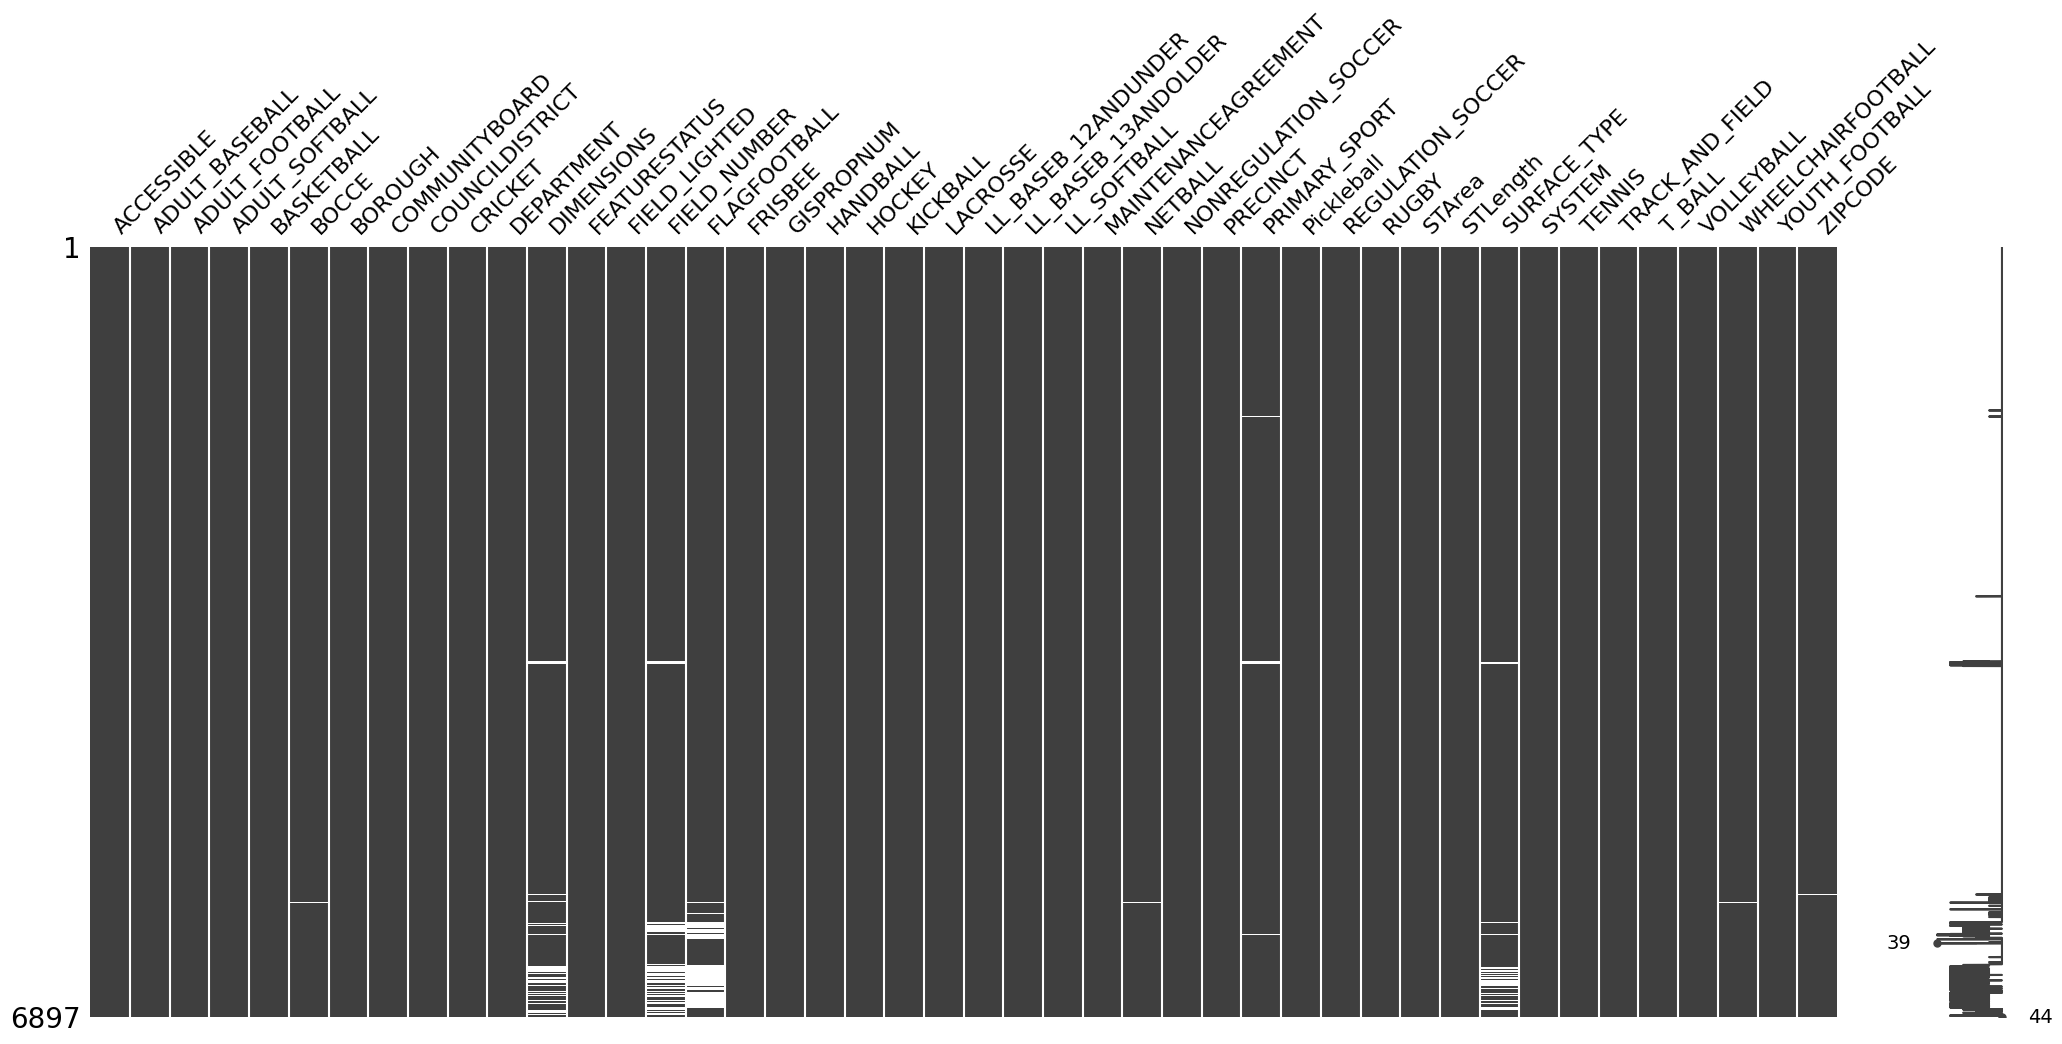

In [14]:
msno.matrix(df)

<Axes: >

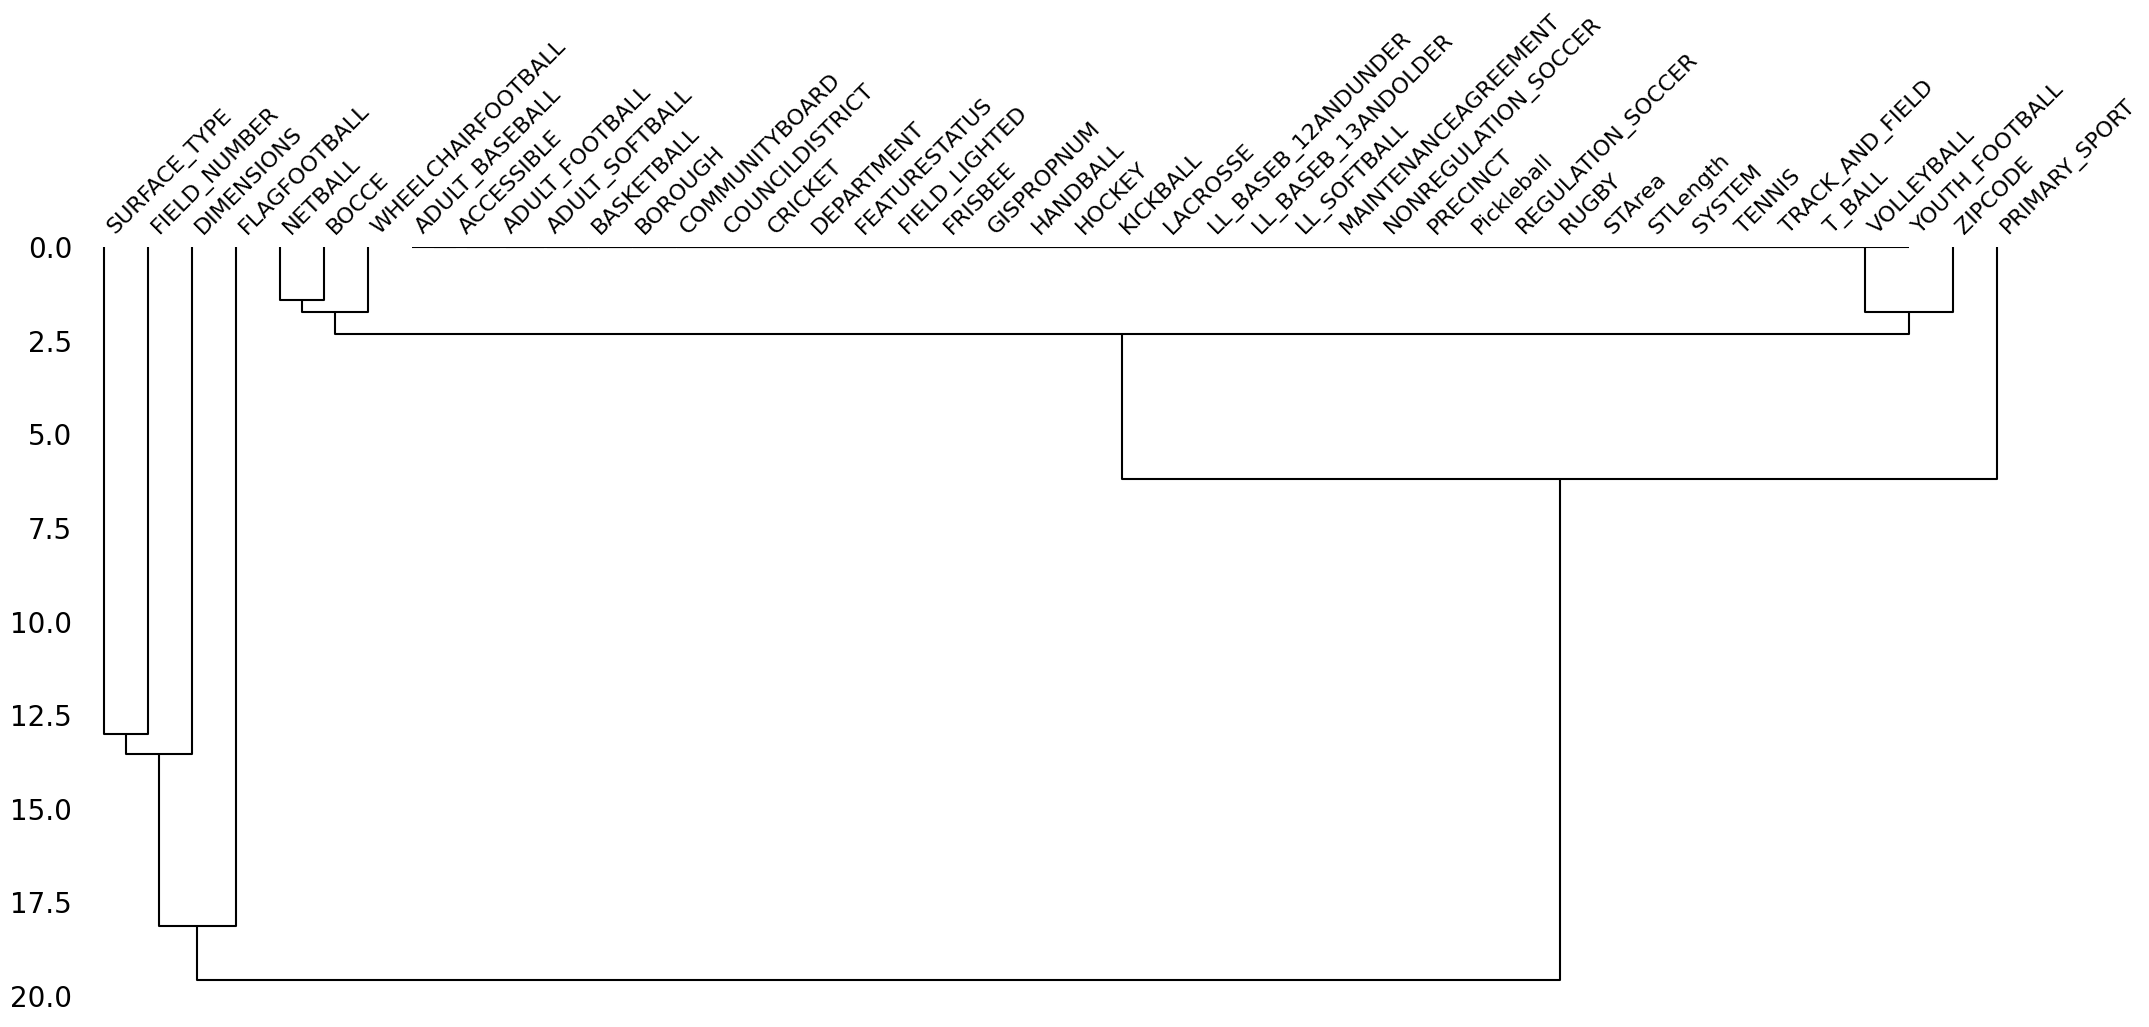

In [15]:
msno.dendrogram(df)

<Axes: >

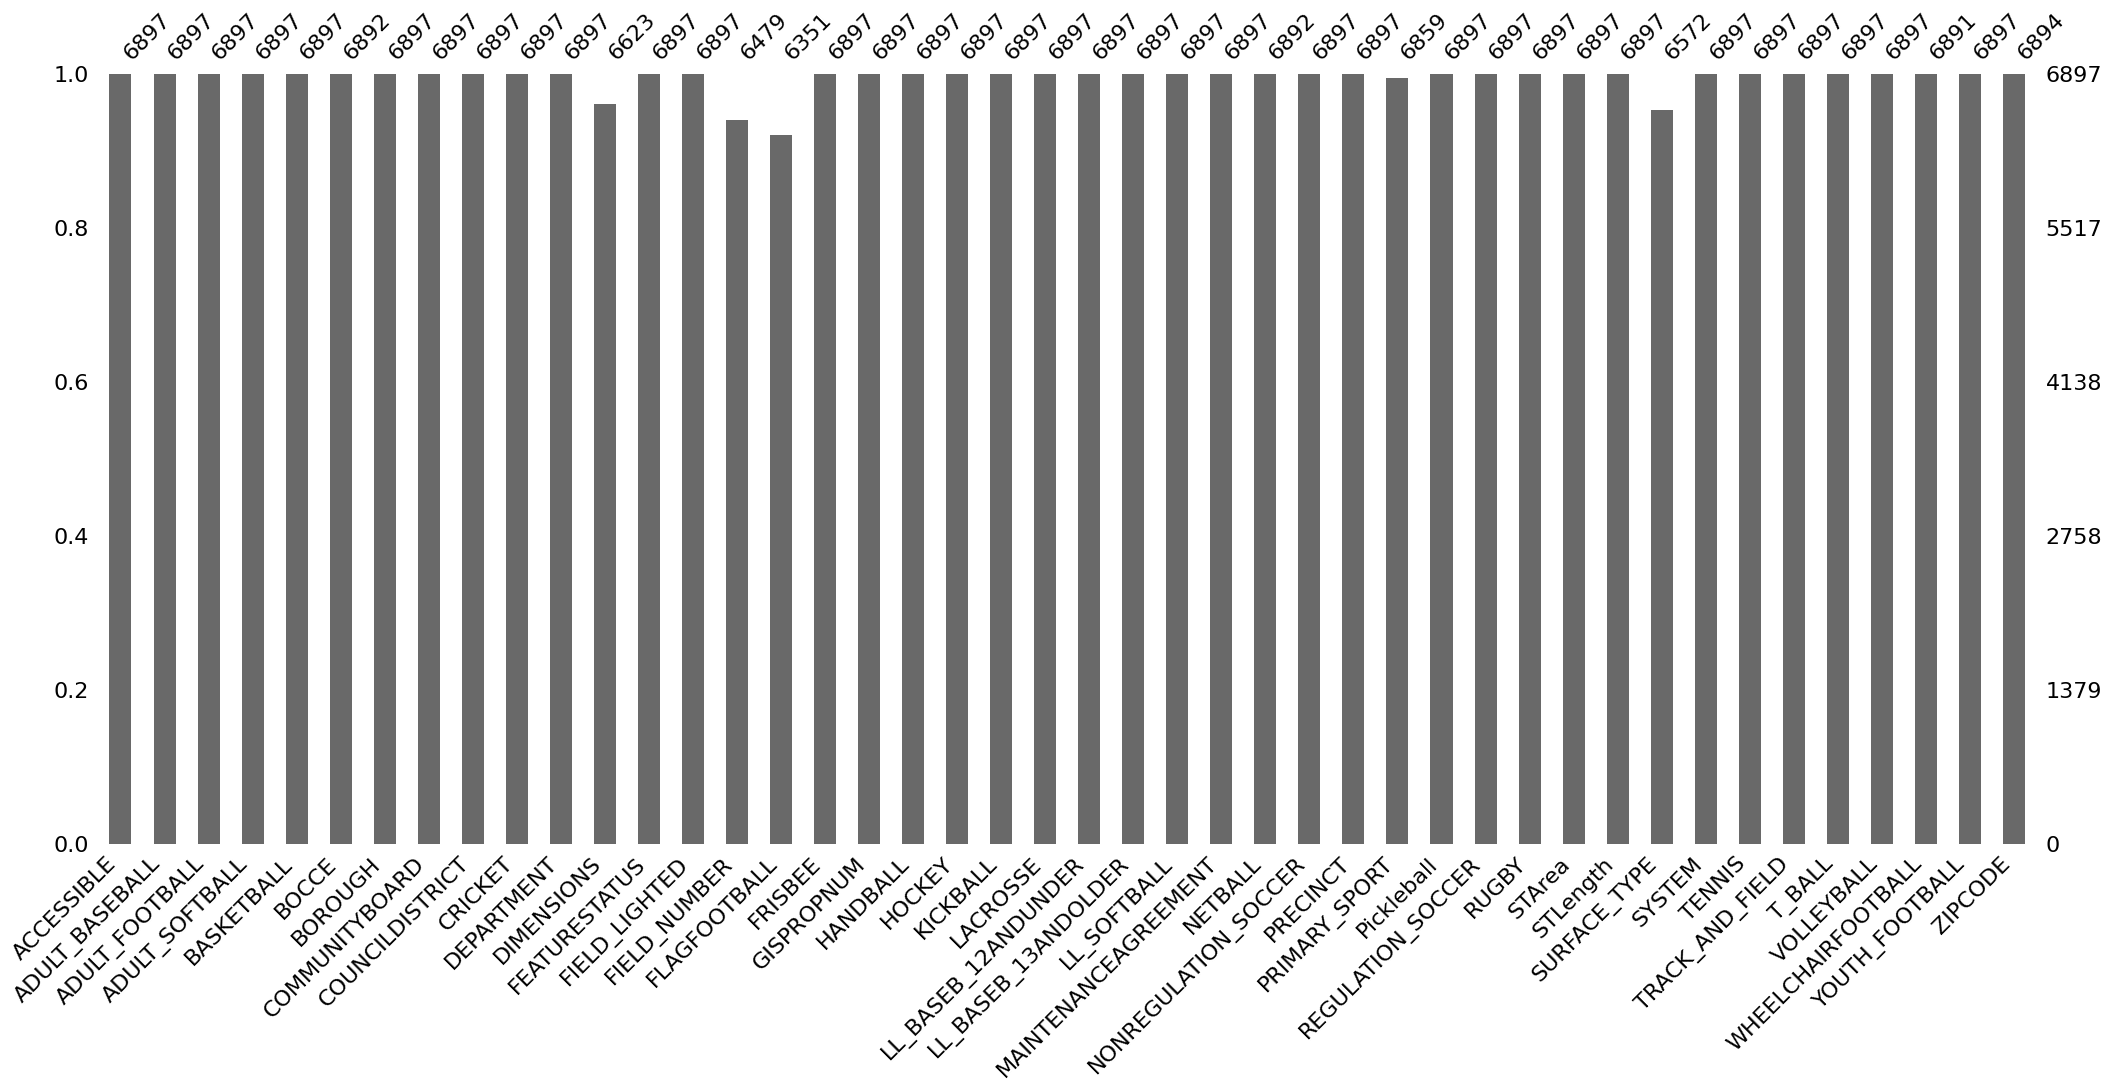

In [16]:
msno.bar(df)

<Axes: >

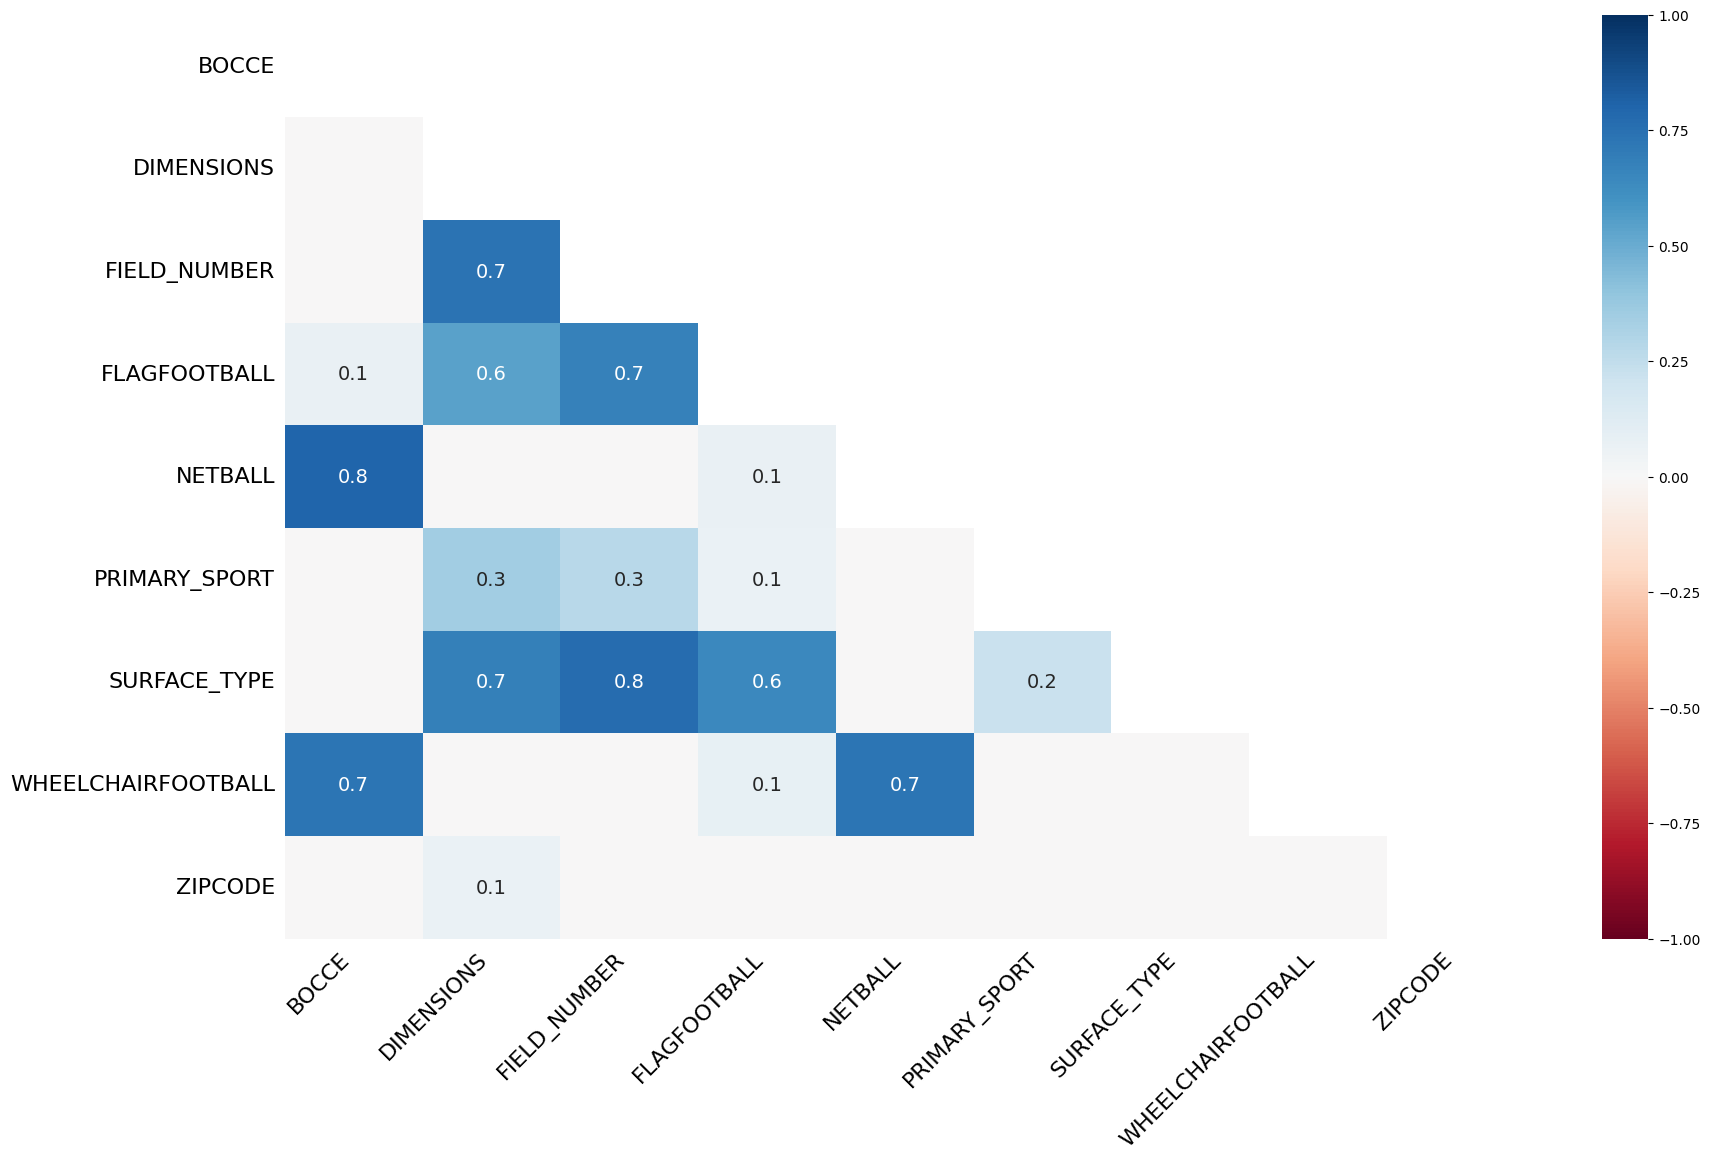

In [17]:
msno.heatmap(df)

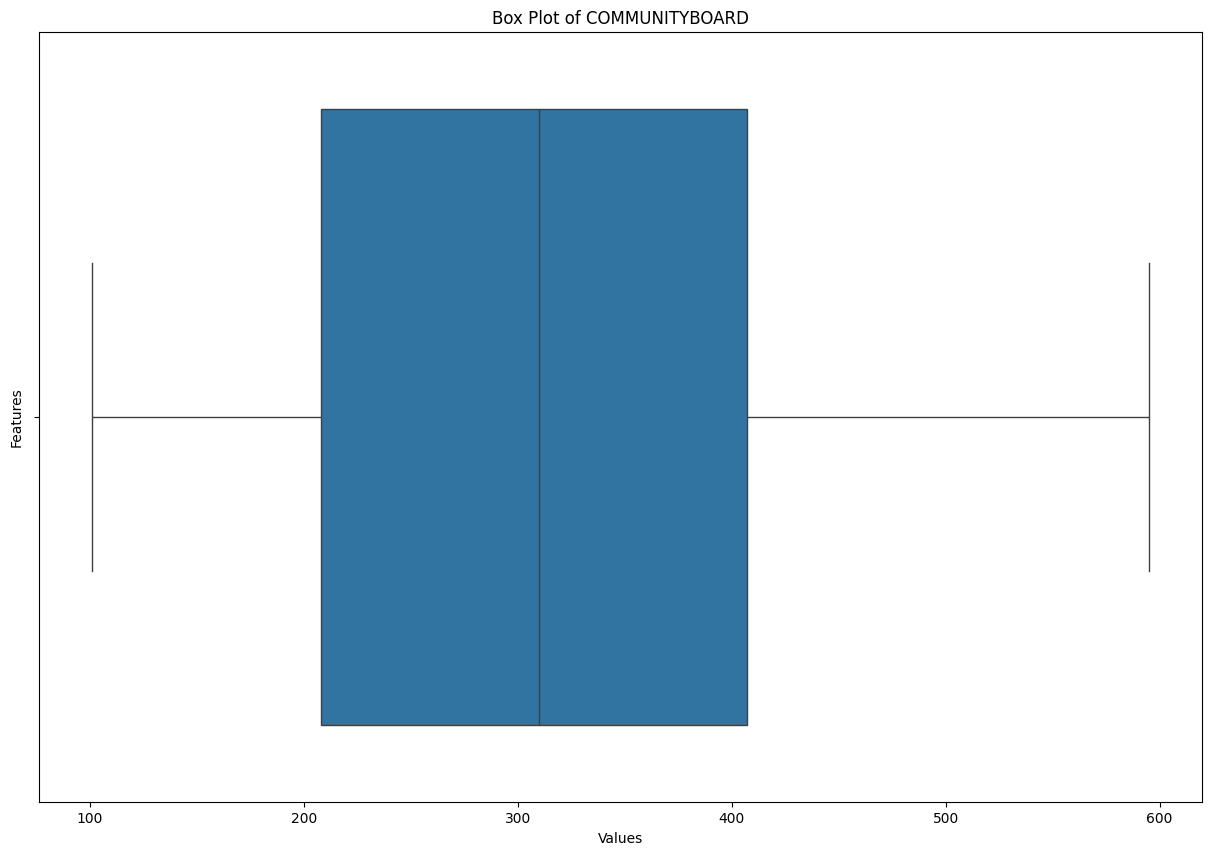

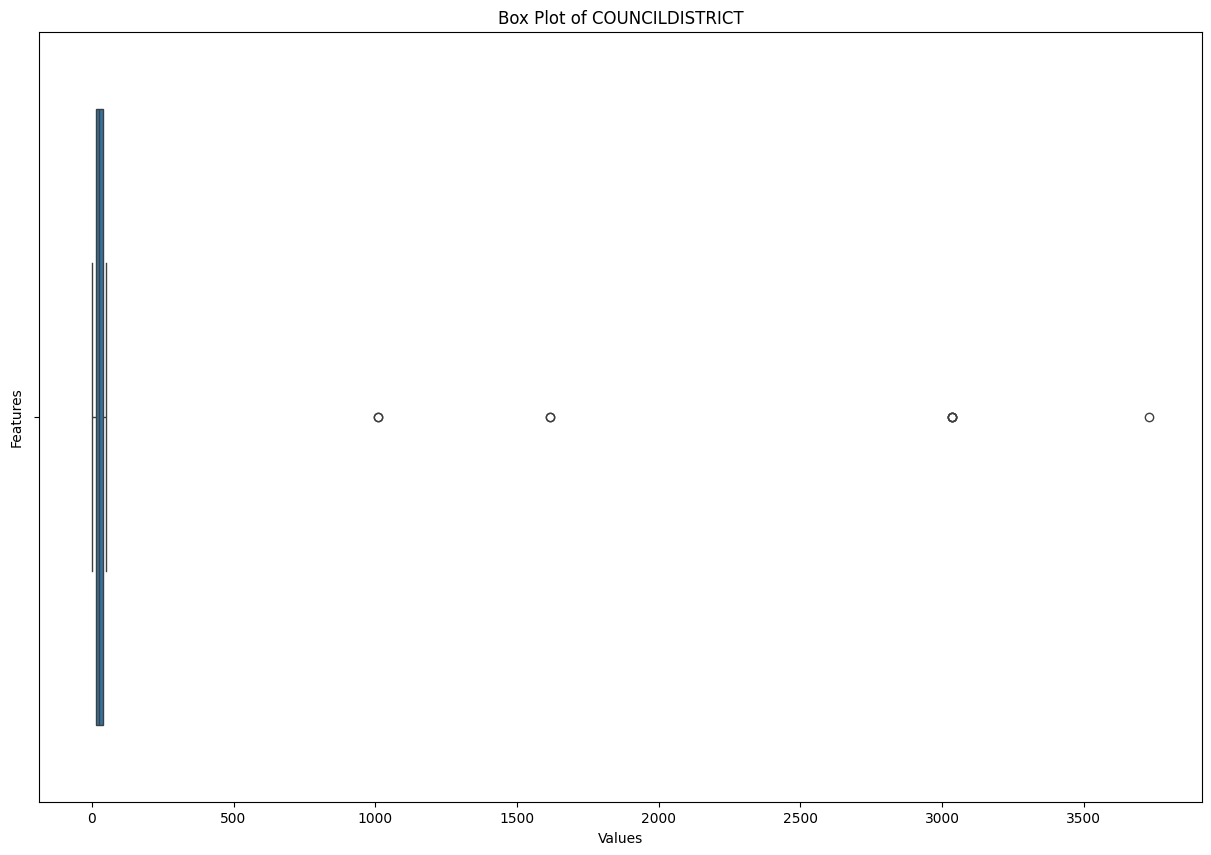

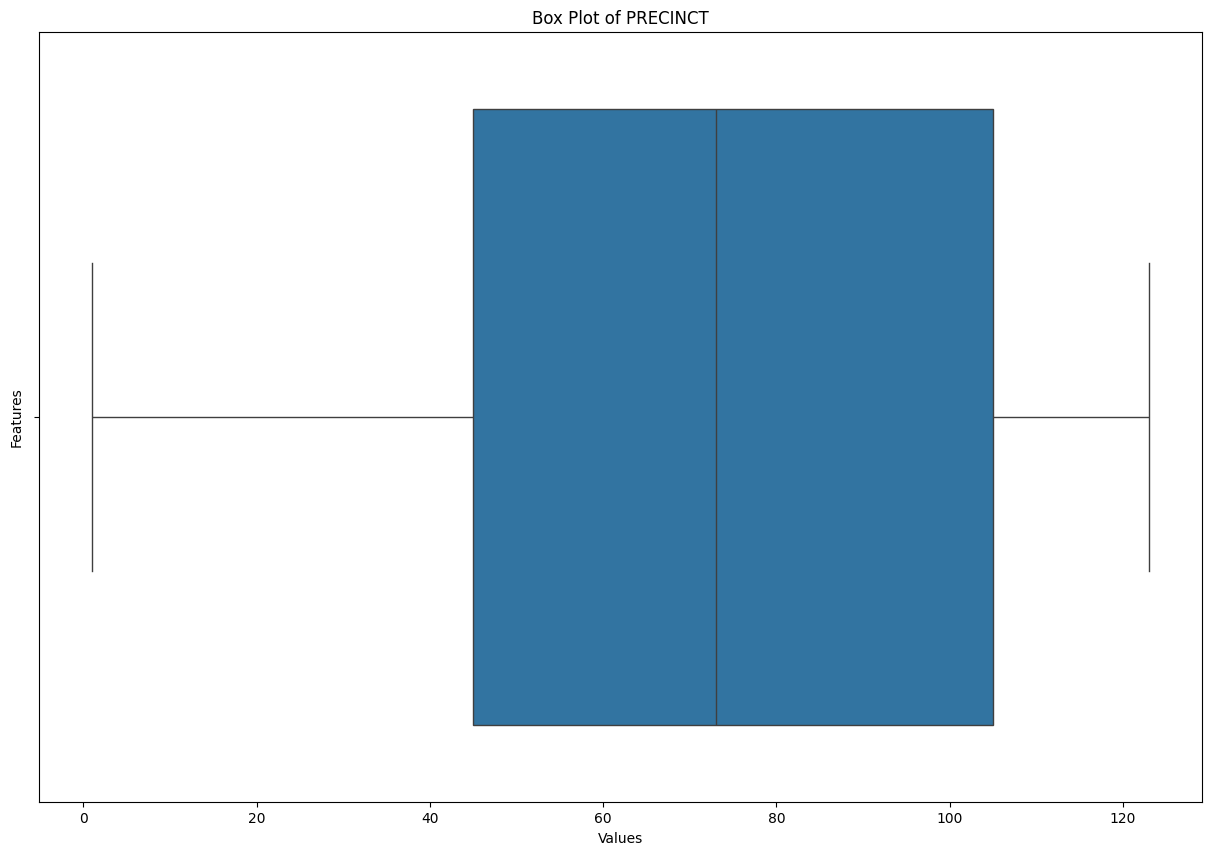

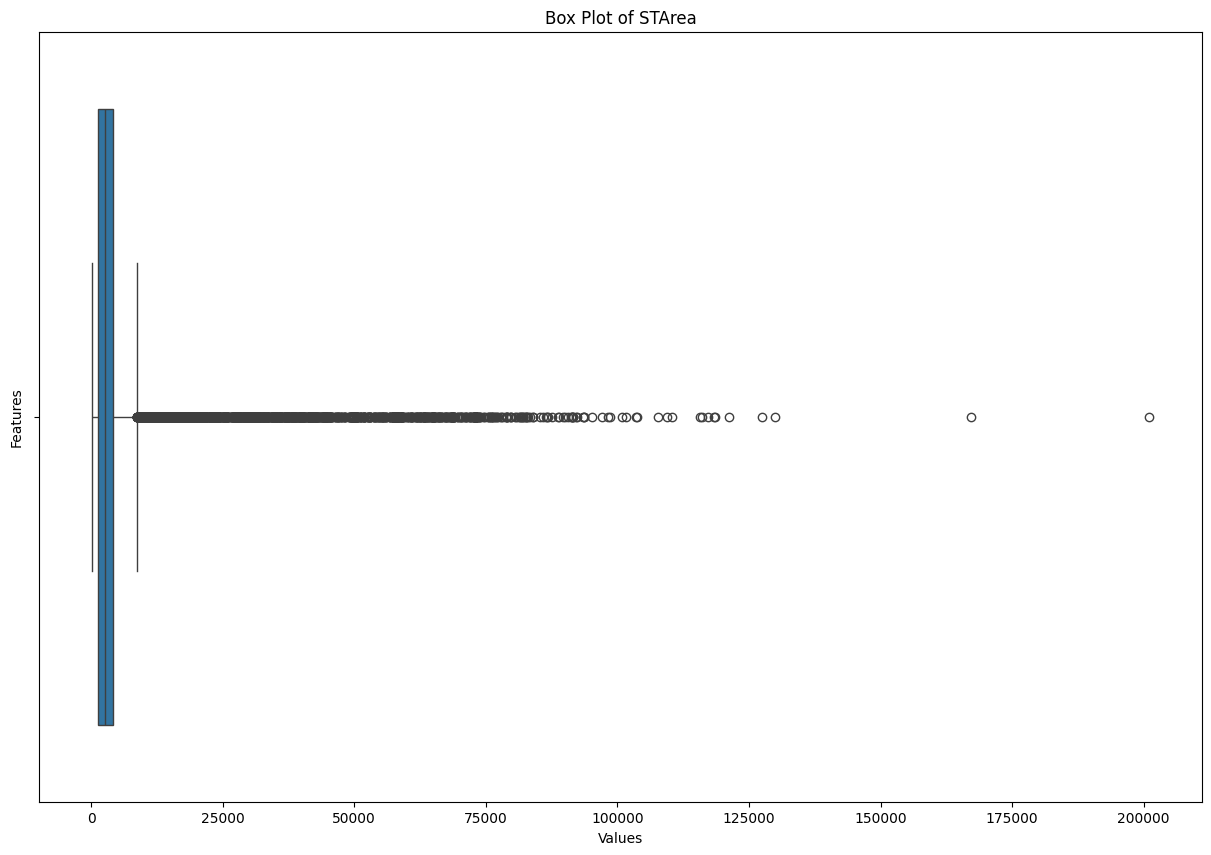

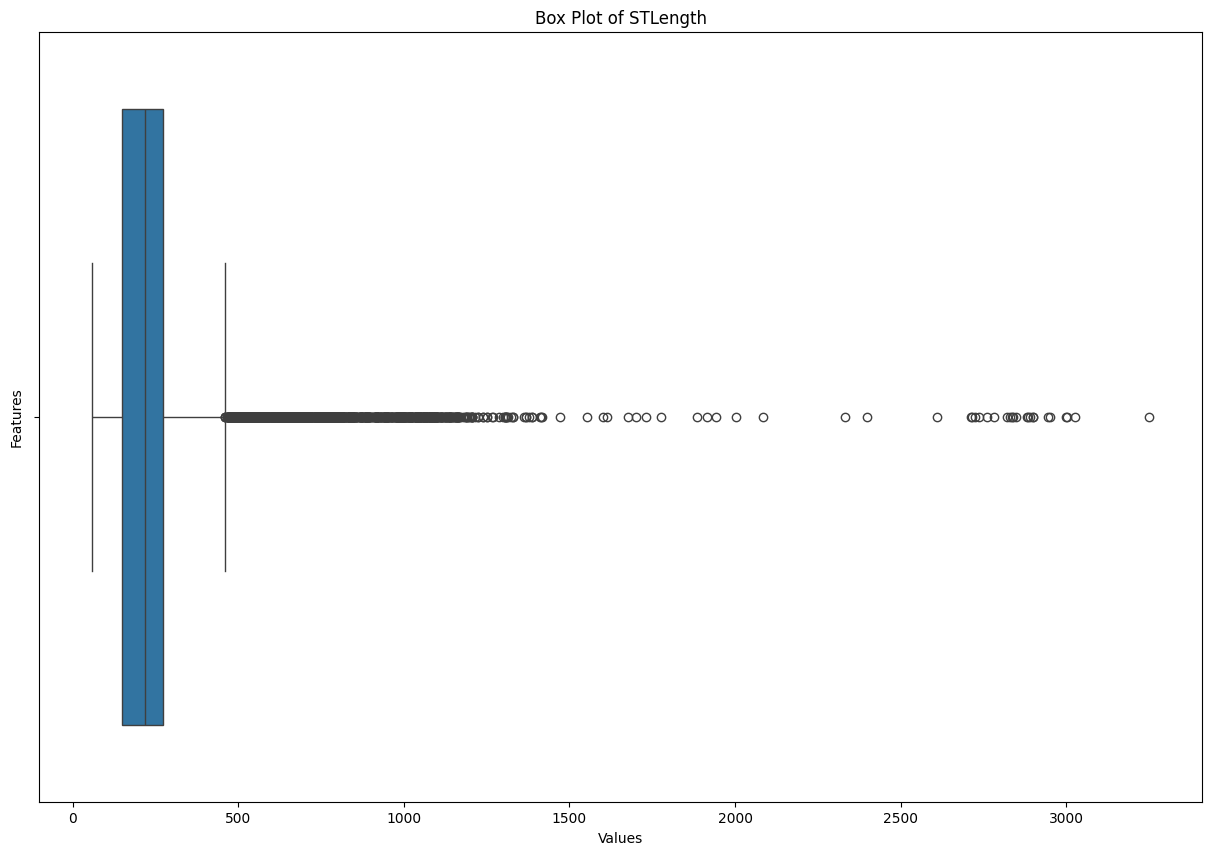

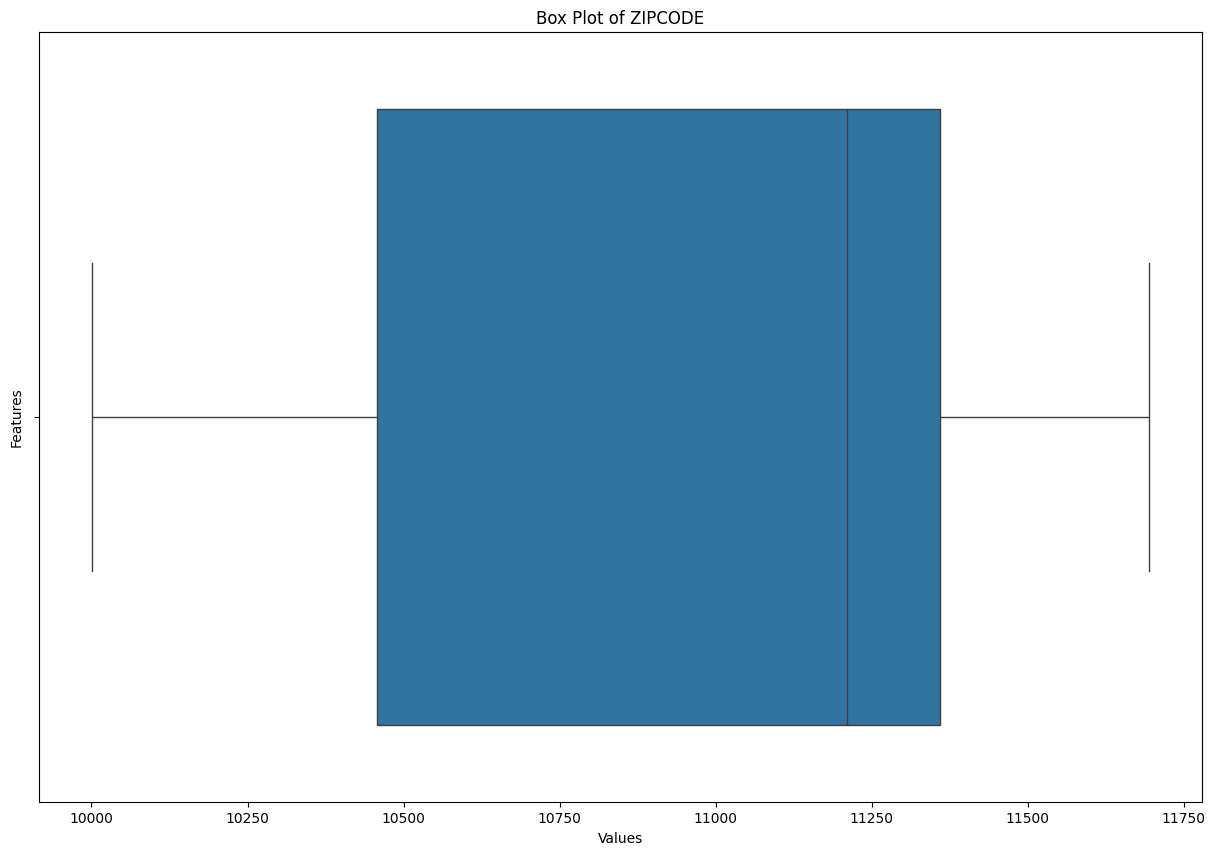

In [18]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

for column in numerical_cols:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[column],orient = 'h')
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Features')
    plt.show()


In [19]:
df[numerical_cols].skew()

COMMUNITYBOARD     -0.241179
COUNCILDISTRICT    31.619119
PRECINCT           -0.254286
STArea              2.842526
STLength            3.356757
ZIPCODE            -0.578887
dtype: float64

In [20]:
df_after = df
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numerical_cols:
  df = remove_outliers_iqr(df, column)

<Figure size 1000x600 with 0 Axes>

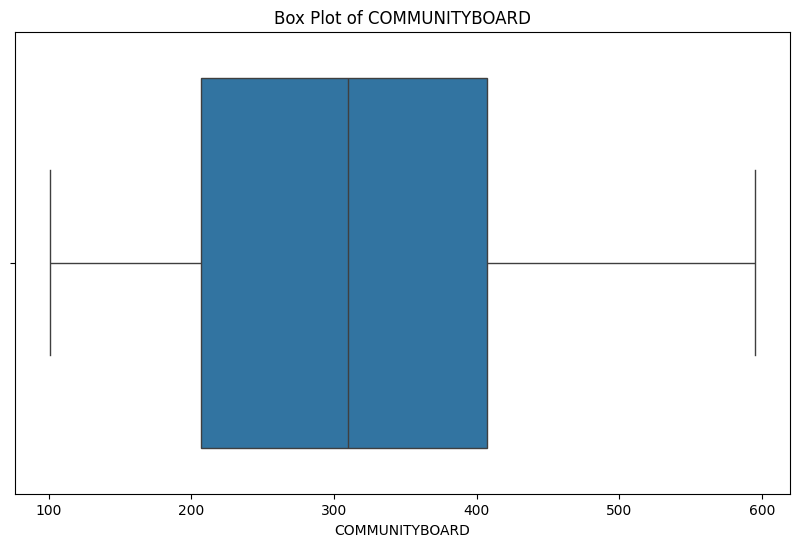

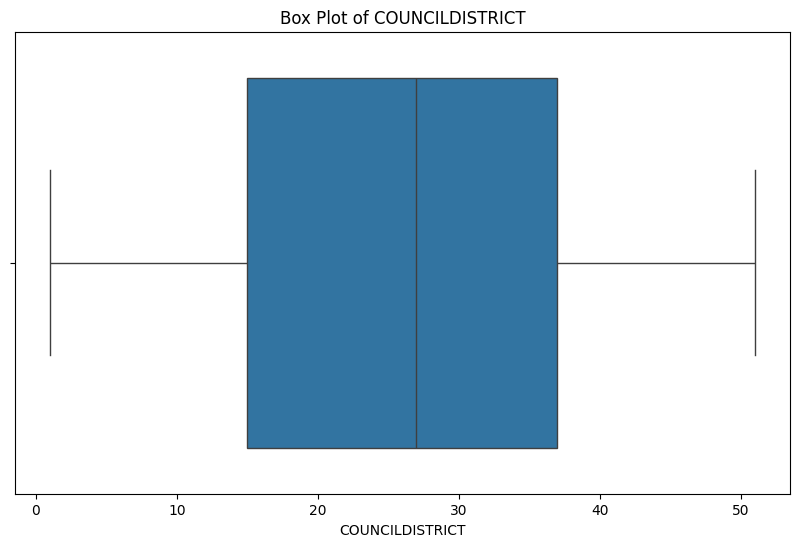

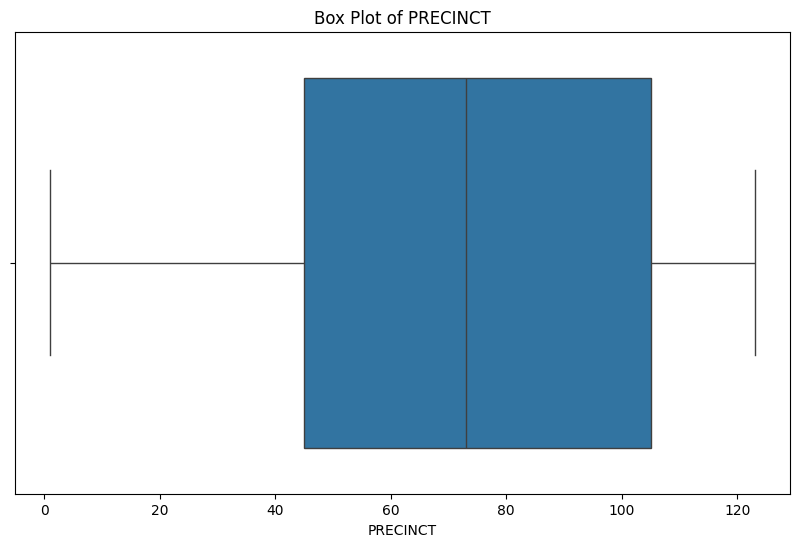

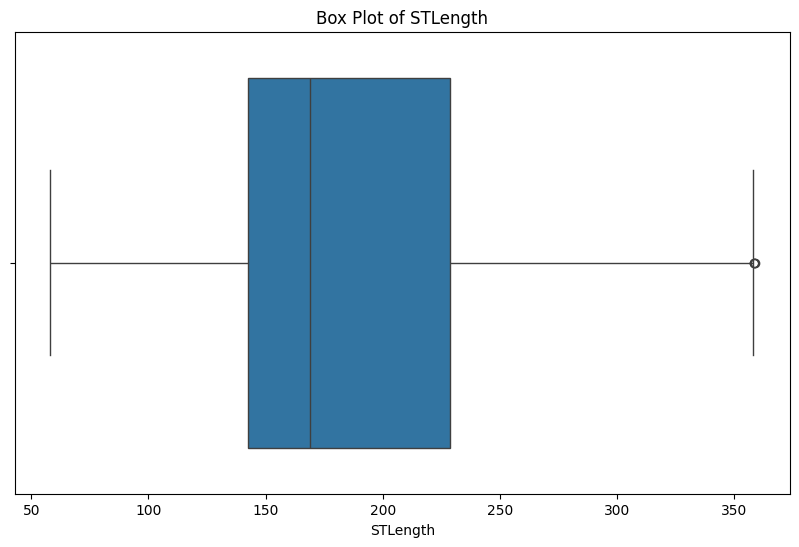

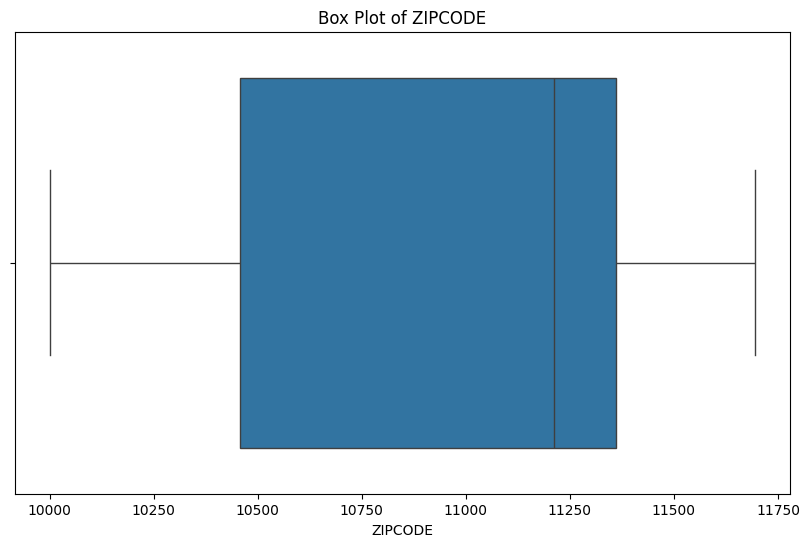

In [22]:
plt.figure(figsize=(10, 6))
for column in numerical_cols:
    if column != 'STArea' :
      plt.figure(figsize=(10, 6))
      sns.boxplot(x=df[column])
      plt.title(f'Box Plot of {column}')
      plt.xlabel(column)
      plt.show()



---



# Missing Value Analysis after removing outliers:

<Axes: >

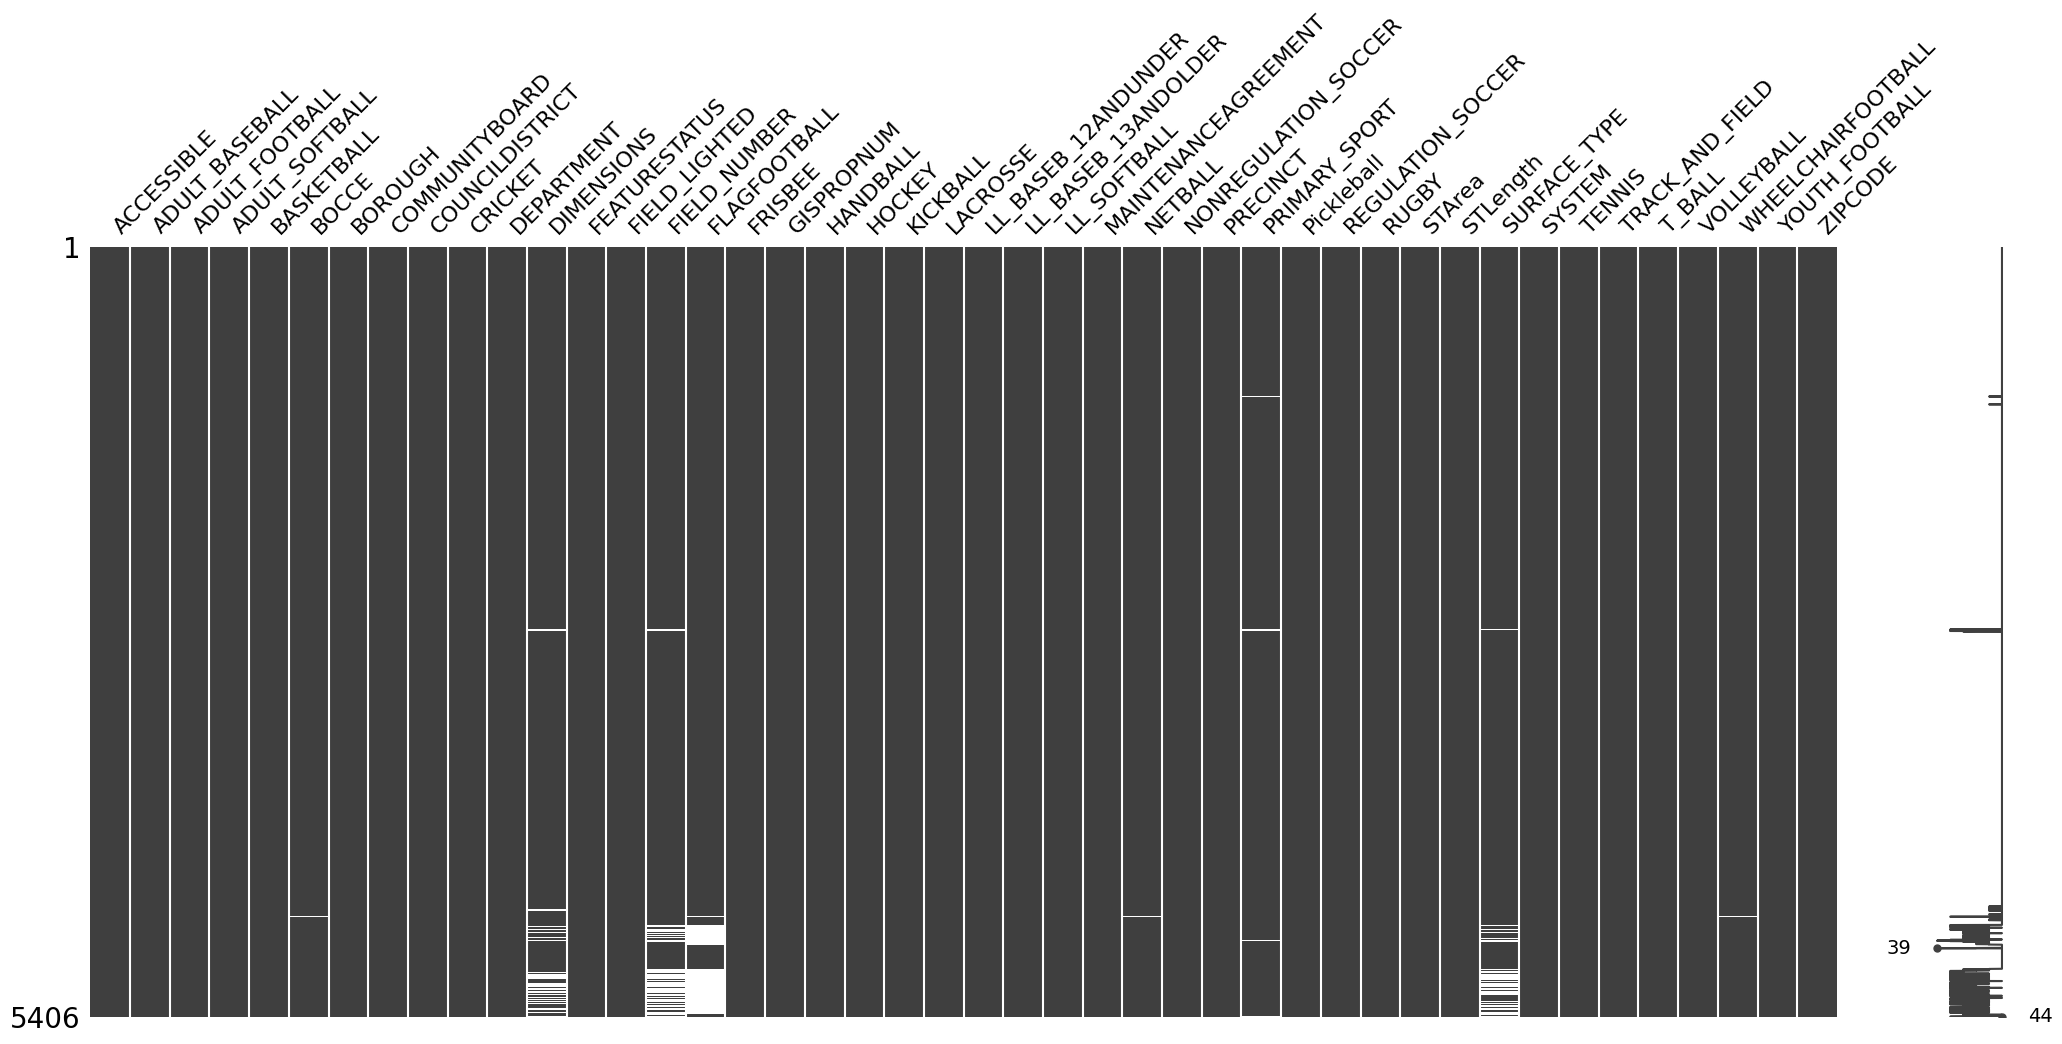

In [23]:
msno.matrix(df)

<Axes: >

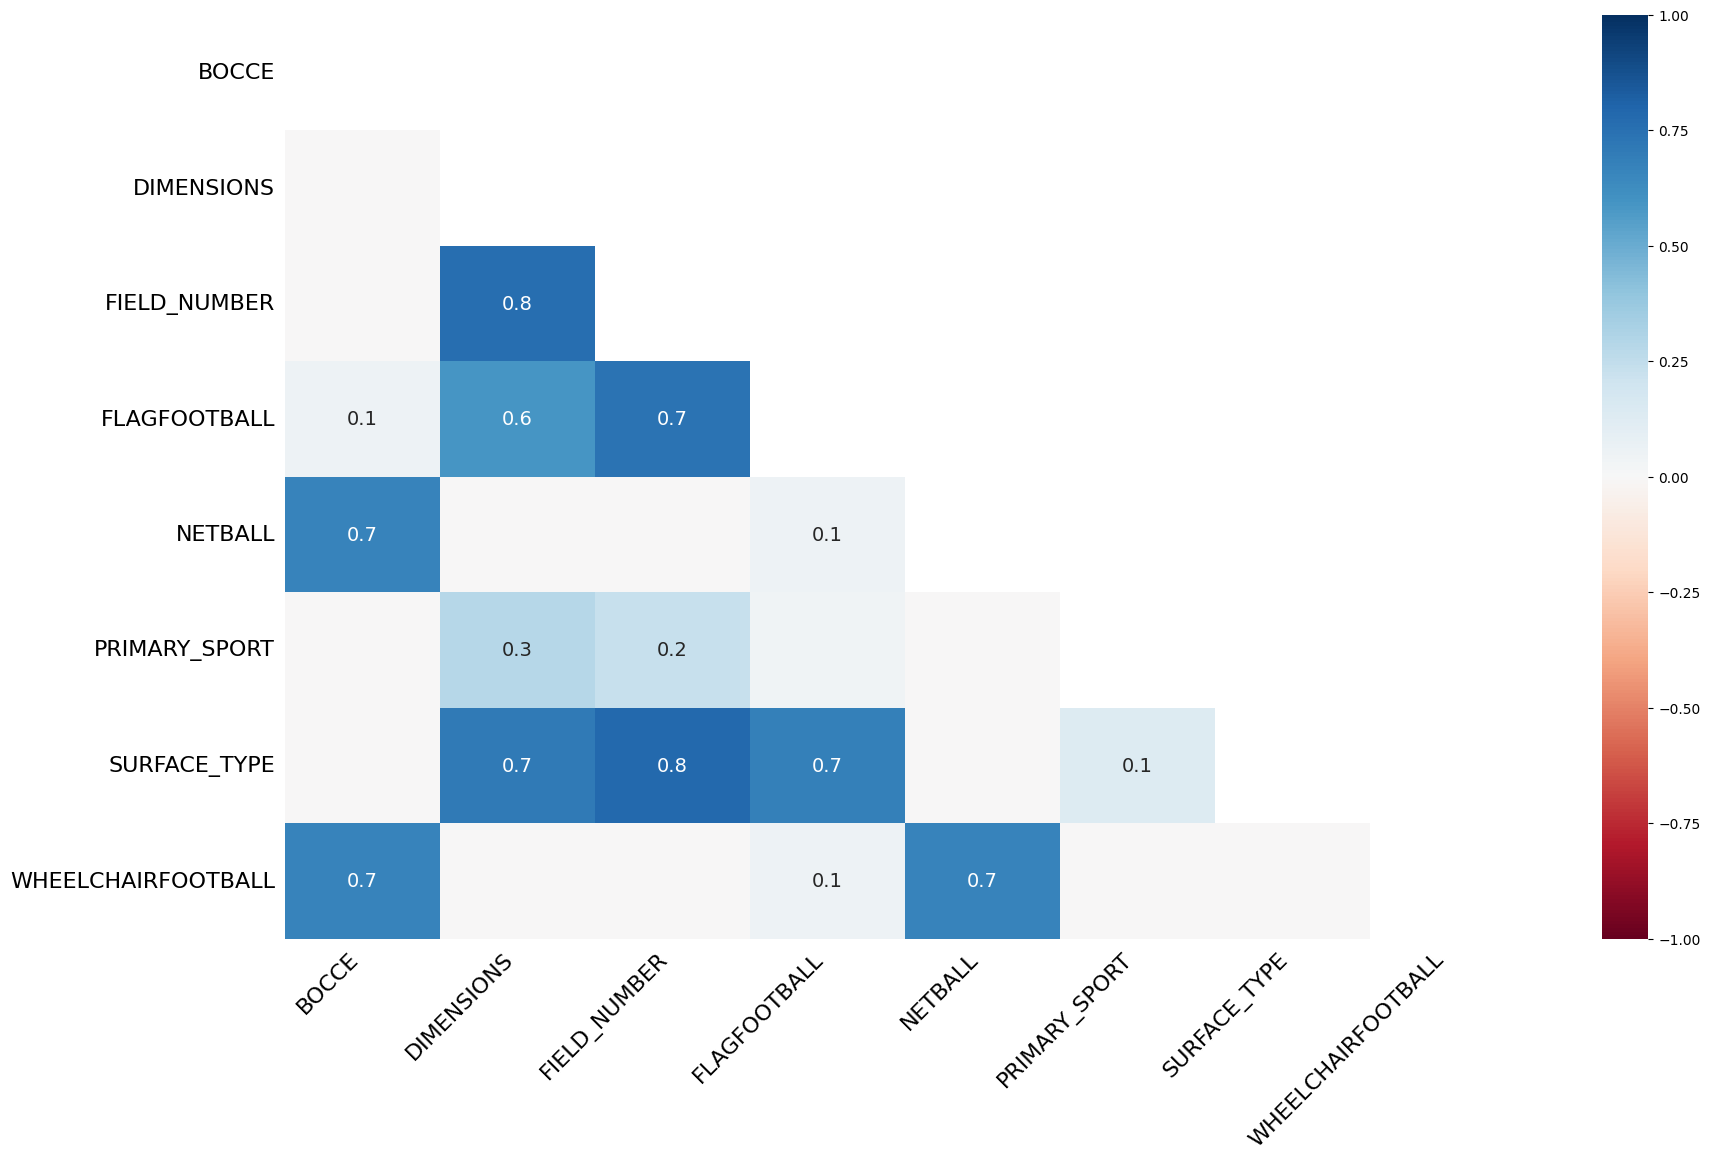

In [24]:
msno.heatmap(df)

<Axes: >

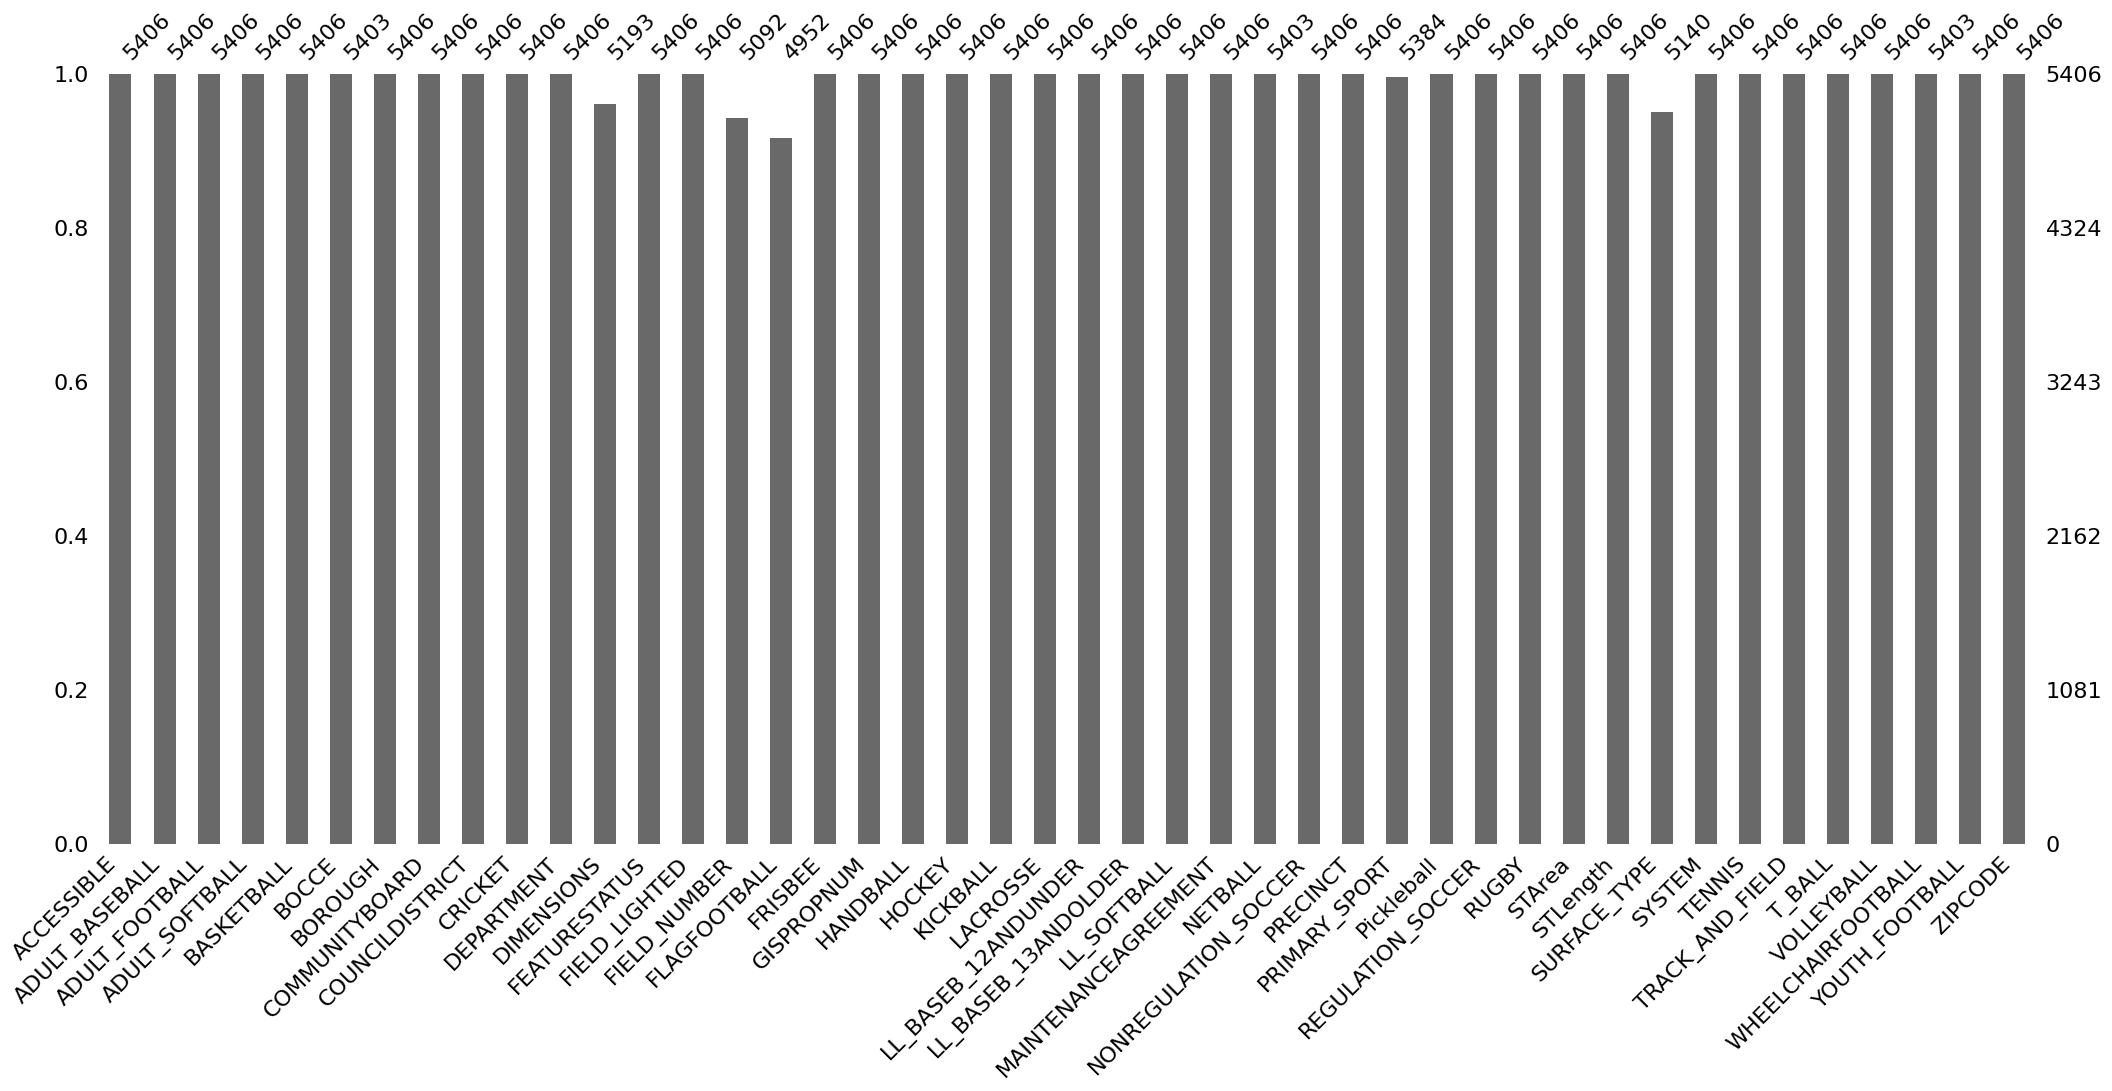

In [25]:
msno.bar(df)

<Axes: >

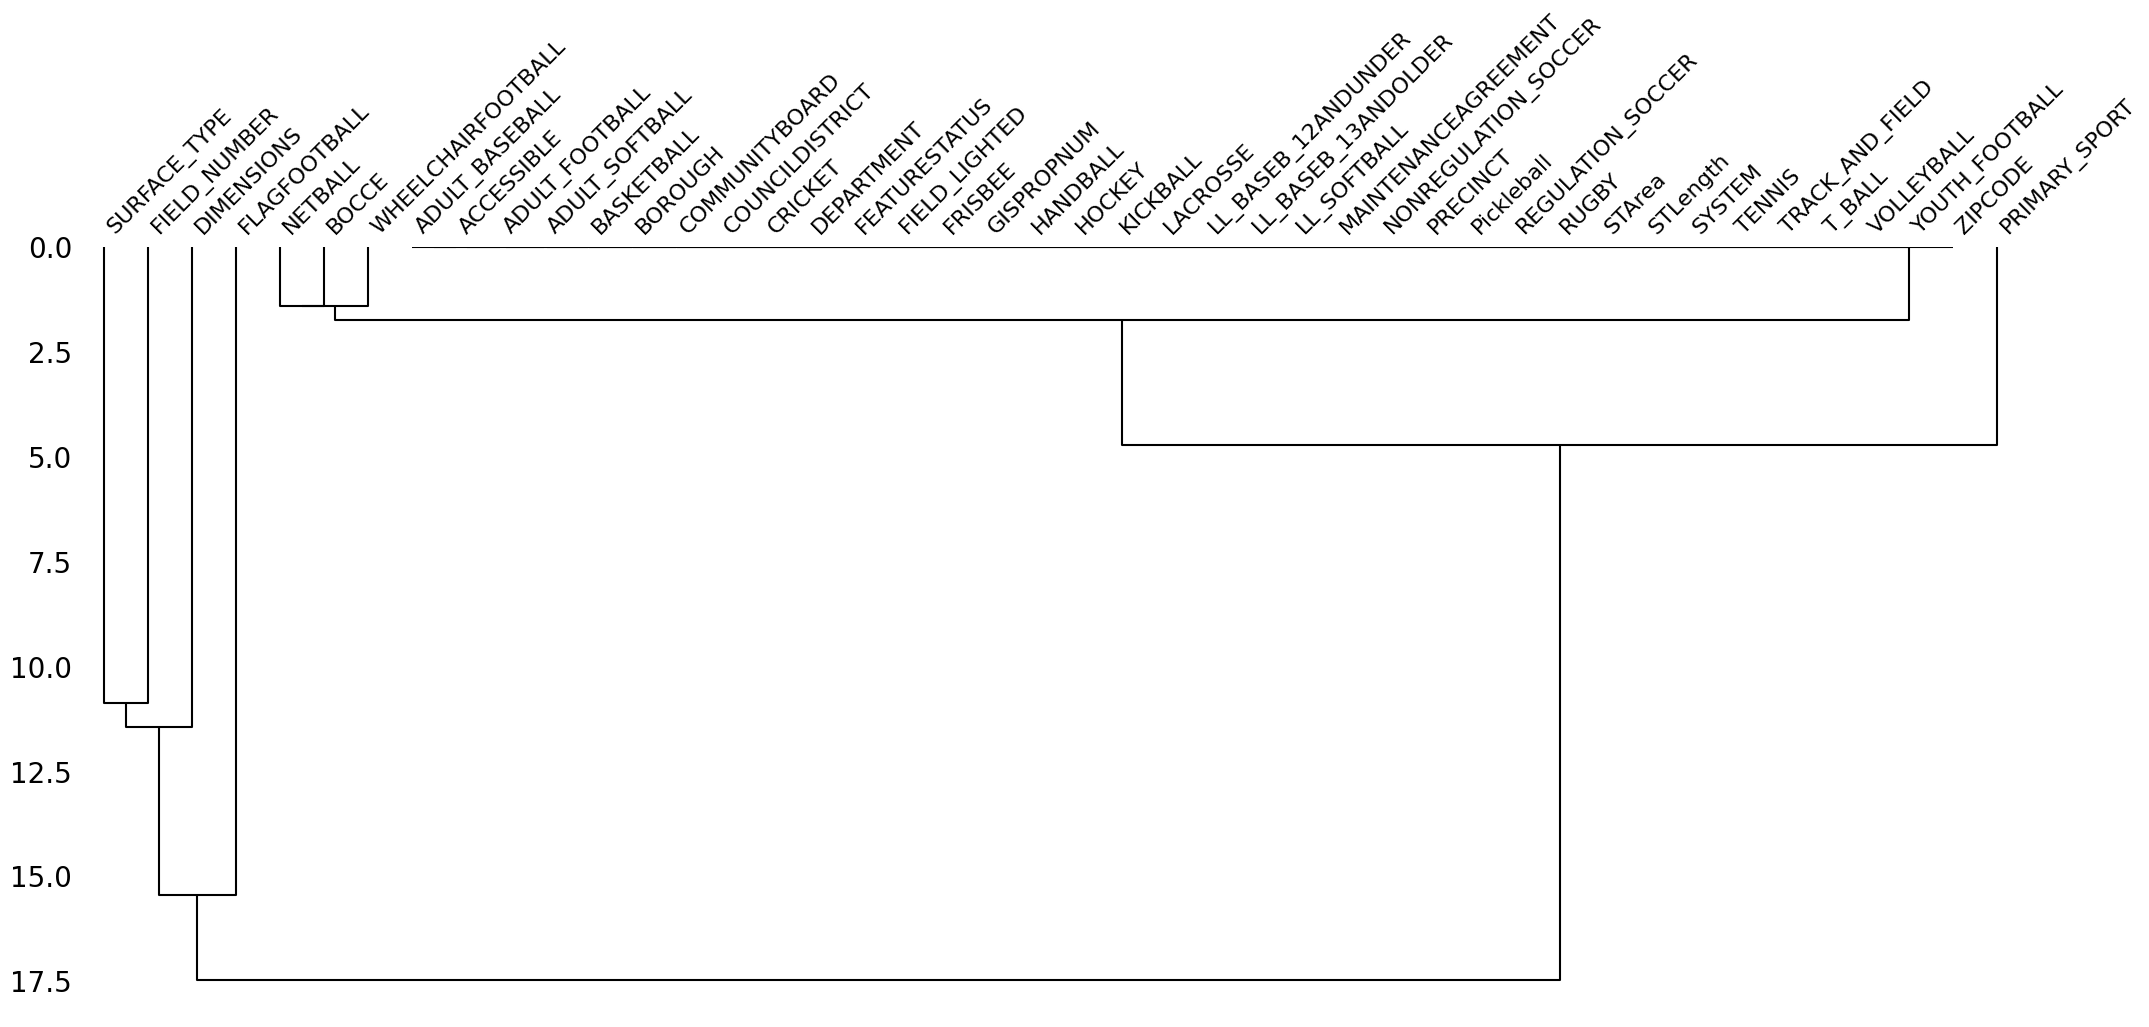

In [26]:
msno.dendrogram(df)



---



# Identifying the type of missingness in the dataset :

**Little MCAR test :**

In [27]:
from scipy.stats import chi2

def little_mcar_test(data, alpha=0.05):
    data = pd.DataFrame(data)
    data.columns = ['x' + str(i) for i in range(data.shape[1])]
    data['missing'] = np.sum(data.isnull(), axis=1)
    n = data.shape[0]
    k = data.shape[1] - 1
    df = k * (k - 1) / 2
    chi2_crit = chi2.ppf(1 - alpha, df)
    chi2_val = ((n - 1 - (k - 1) / 2) ** 2) / (k - 1) / ((n - k) * np.mean(data['missing']))
    p_val = 1 - chi2.cdf(chi2_val, df)
    if chi2_val > chi2_crit:
        print(
            'Reject null hypothesis: Data is not MCAR (p-value={:.4f}, chi-square={:.4f})'.format(p_val, chi2_val)
        )
    else:
        print(
            'Do not reject null hypothesis: Data is MCAR (p-value={:.4f}, chi-square={:.4f})'.format(p_val, chi2_val)
        )
little_mcar_test(df,0.05)

Do not reject null hypothesis: Data is MCAR (p-value=1.0000, chi-square=531.7155)


So missing data is of MCAR type by Little MCAR test.So we can do mean imputation.



---



# Imputation :

In [28]:
numeric_cols = df.select_dtypes(include=['number']).columns
df.fillna(df.mean(numeric_only=True), inplace=True)


boolean_cols = df.select_dtypes(include=['object']).columns
for col in boolean_cols:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

In [29]:
df.isnull().sum()

ACCESSIBLE              0
ADULT_BASEBALL          0
ADULT_FOOTBALL          0
ADULT_SOFTBALL          0
BASKETBALL              0
BOCCE                   0
BOROUGH                 0
COMMUNITYBOARD          0
COUNCILDISTRICT         0
CRICKET                 0
DEPARTMENT              0
DIMENSIONS              0
FEATURESTATUS           0
FIELD_LIGHTED           0
FIELD_NUMBER            0
FLAGFOOTBALL            0
FRISBEE                 0
GISPROPNUM              0
HANDBALL                0
HOCKEY                  0
KICKBALL                0
LACROSSE                0
LL_BASEB_12ANDUNDER     0
LL_BASEB_13ANDOLDER     0
LL_SOFTBALL             0
MAINTENANCEAGREEMENT    0
NETBALL                 0
NONREGULATION_SOCCER    0
PRECINCT                0
PRIMARY_SPORT           0
Pickleball              0
REGULATION_SOCCER       0
RUGBY                   0
STArea                  0
STLength                0
SURFACE_TYPE            0
SYSTEM                  0
TENNIS                  0
TRACK_AND_FI

In [30]:
df.shape

(5406, 44)

In [ ]:
# import pandas as pd
# from google.colab import drive

# drive.mount('/content/drive')

# df.to_csv('/content/drive/My Drive/df.csv', index=False)

# df_verify = pd.read_csv('/content/drive/My Drive/df.csv')
# print(df_verify)



---



### VISUALISATION :-

**--> Most of the parts are implemented in POWER BI visualisation tool and some are depicted here .**

Text(0.5, 1.0, 'BOROUGH over each of the primary sports')

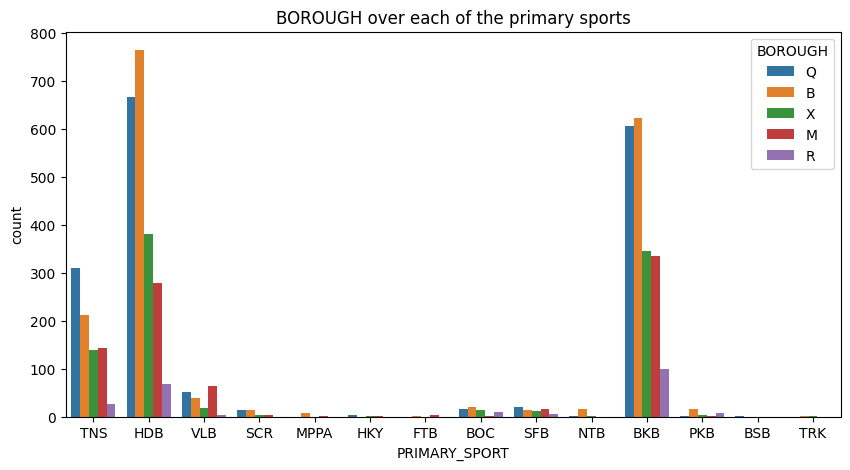

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PRIMARY_SPORT',hue='BOROUGH')
#sns.set(rc={'figure.figsize':(10,15)})
plt.title("BOROUGH over each of the primary sports")

Text(0.5, 1.0, 'Type of surface types over the primary sport')

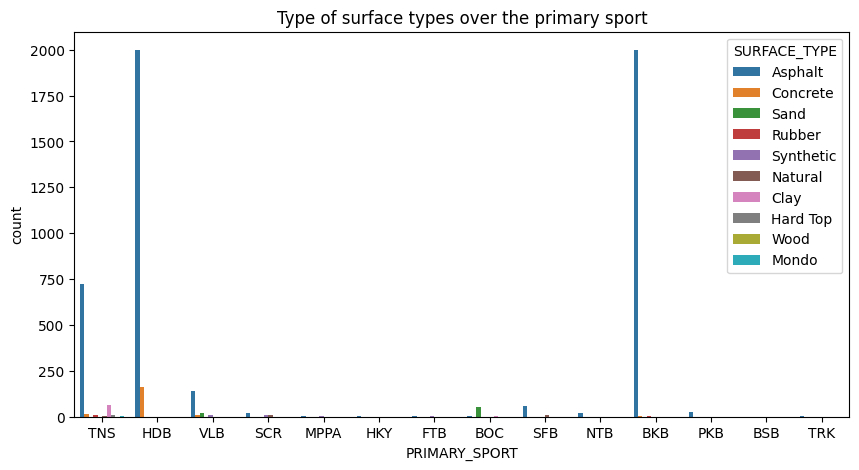

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PRIMARY_SPORT',hue='SURFACE_TYPE')
#sns.set(rc={'figure.figsize':(10,15)})
plt.title("Type of surface types over the primary sport")

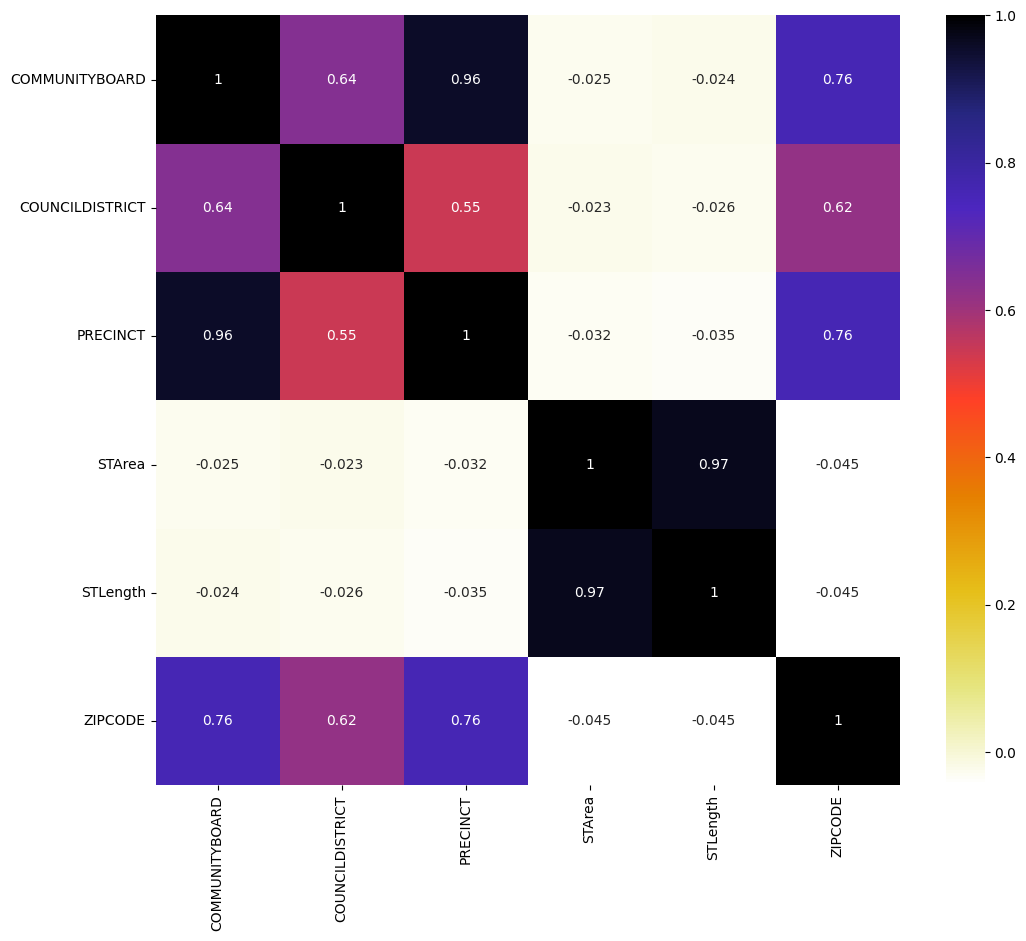

In [33]:
plt.figure(figsize=(12,10))
numerical_cols1 = df.select_dtypes(include=['int64','float64']).columns
cor = df[numerical_cols1].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

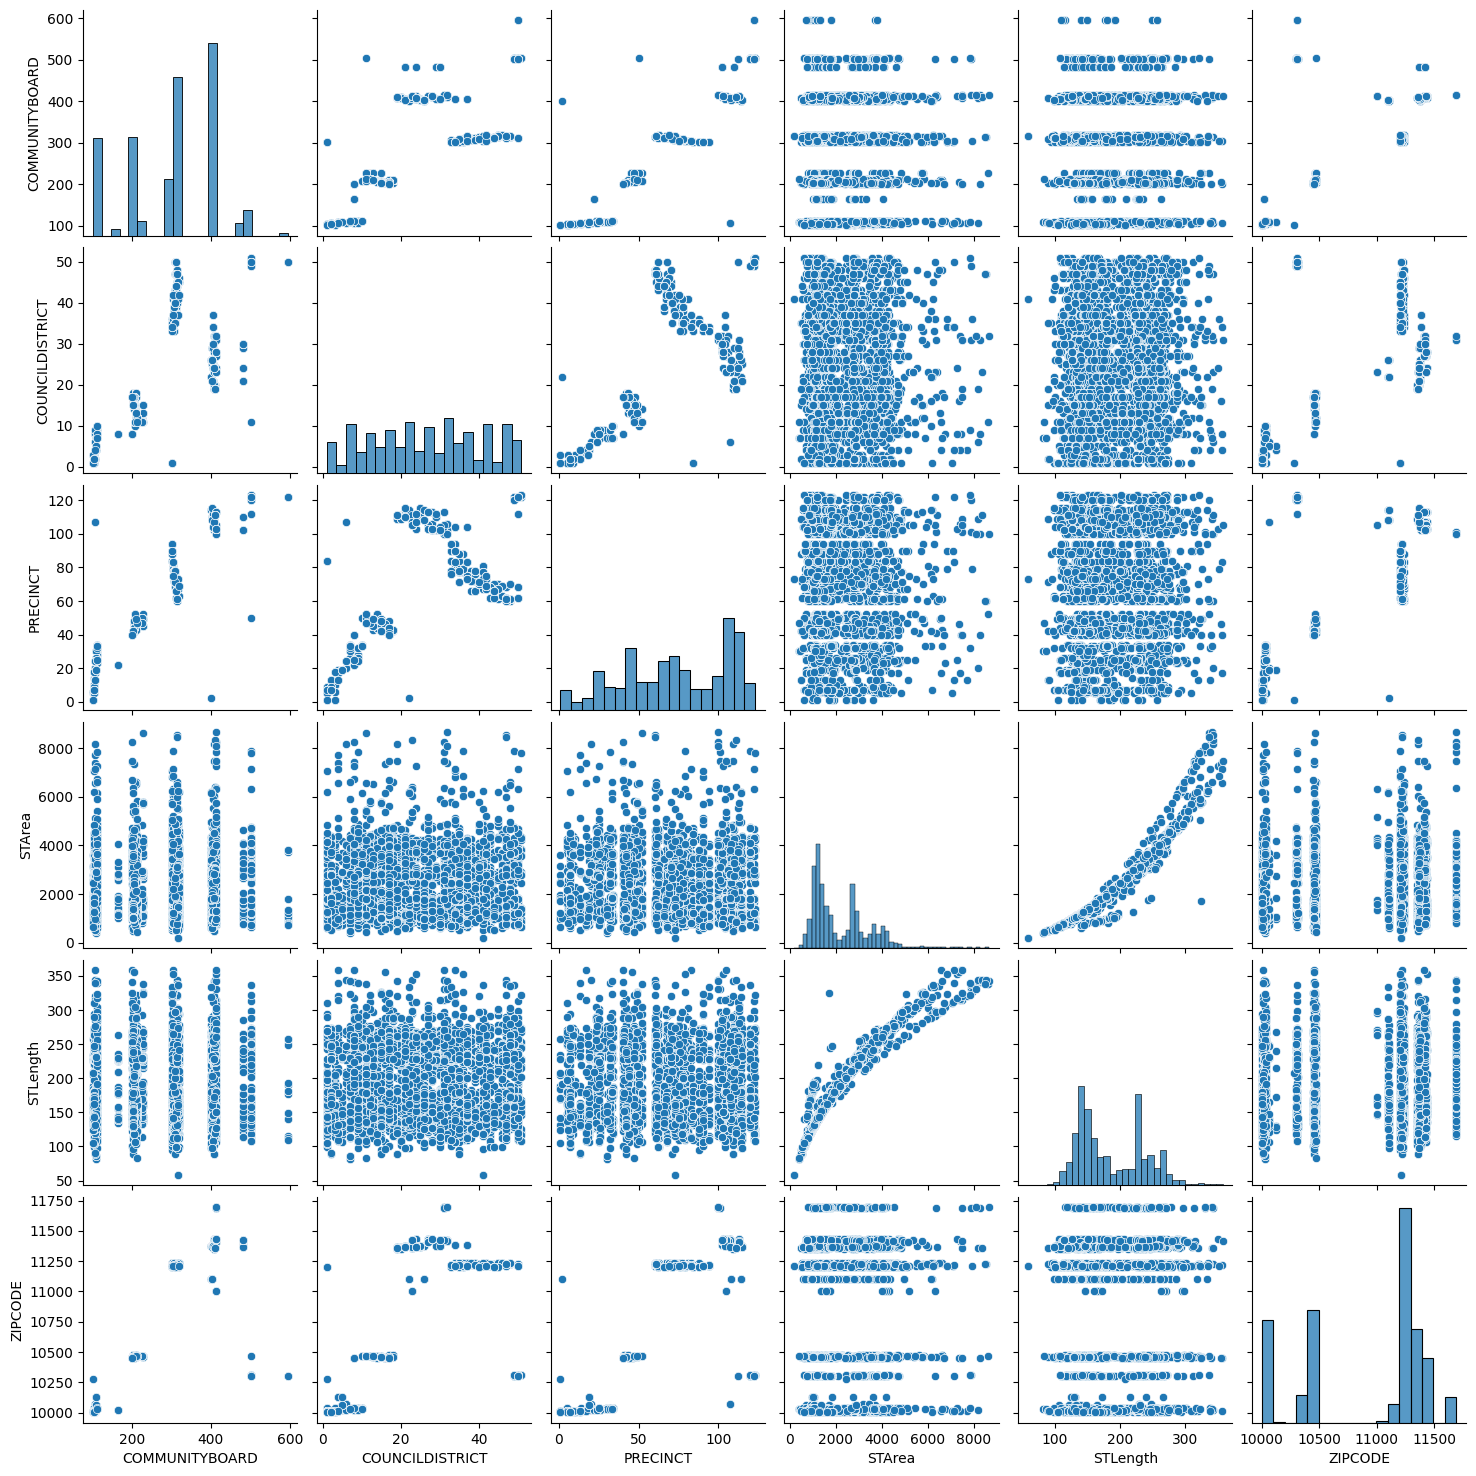

In [34]:
sns.pairplot(df[numerical_cols1])

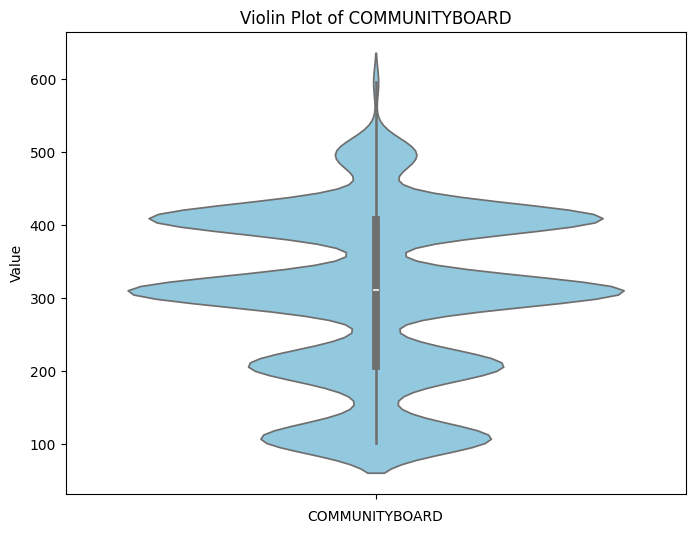

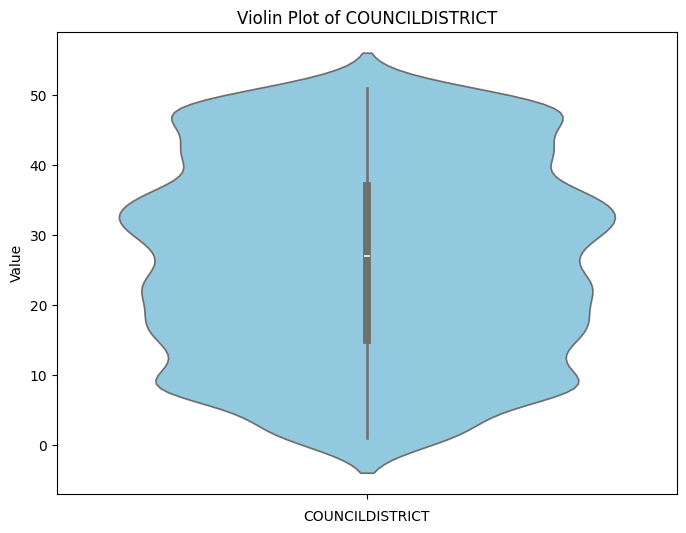

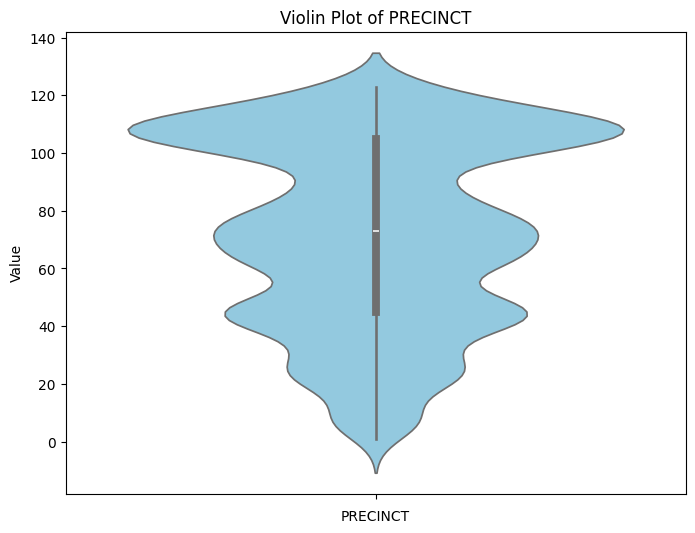

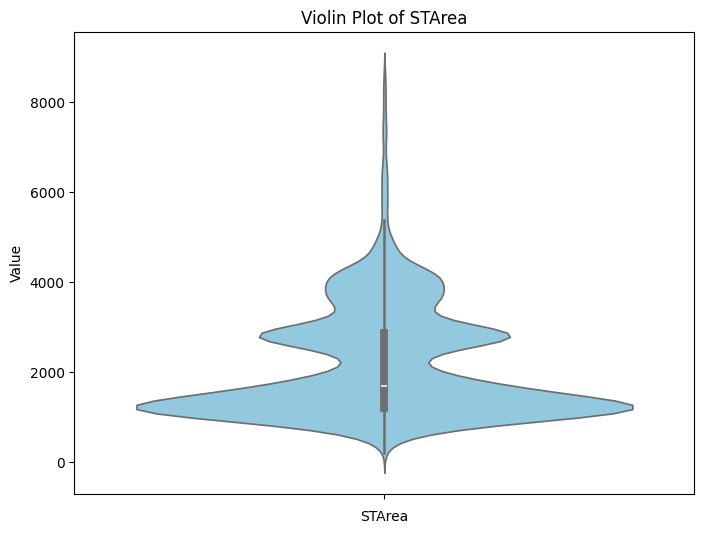

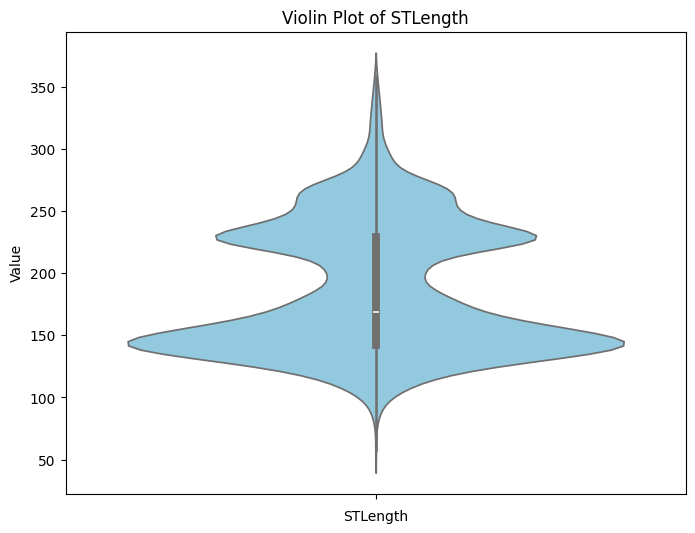

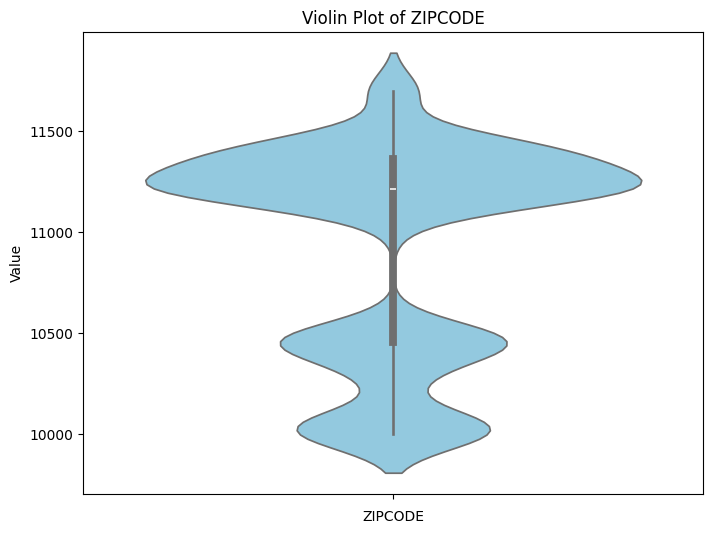

In [35]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[column], color='skyblue')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


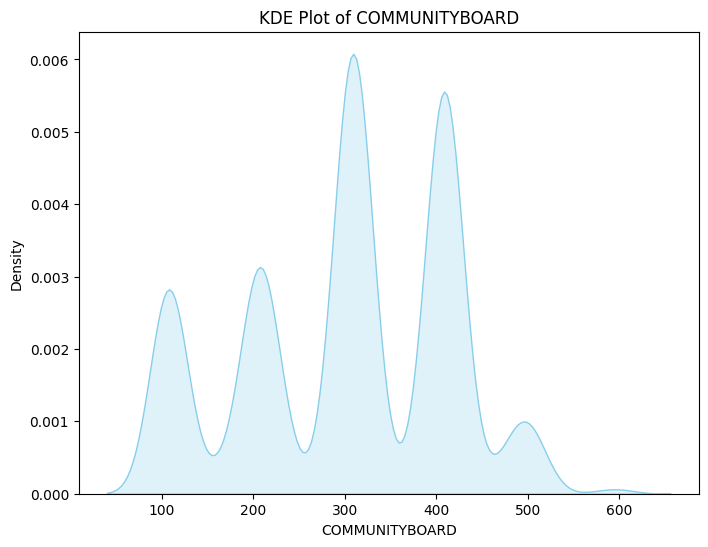

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


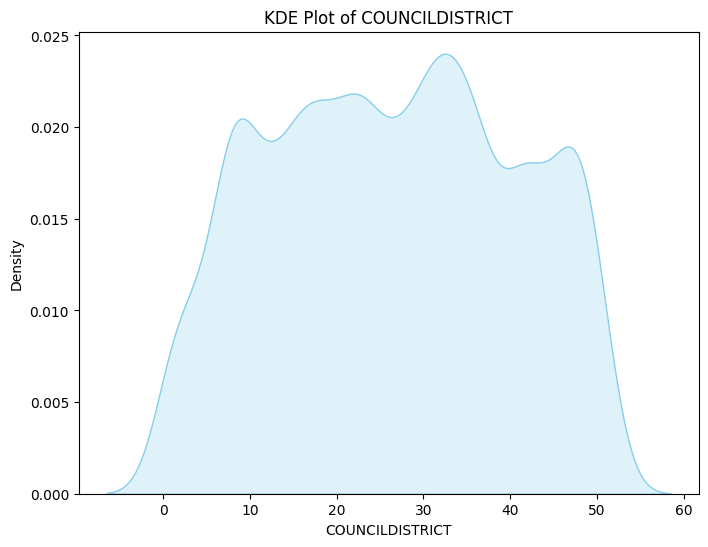

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


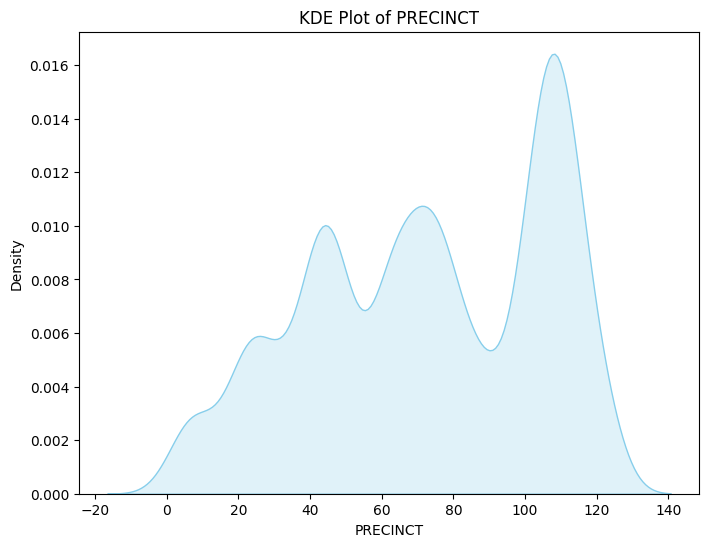

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


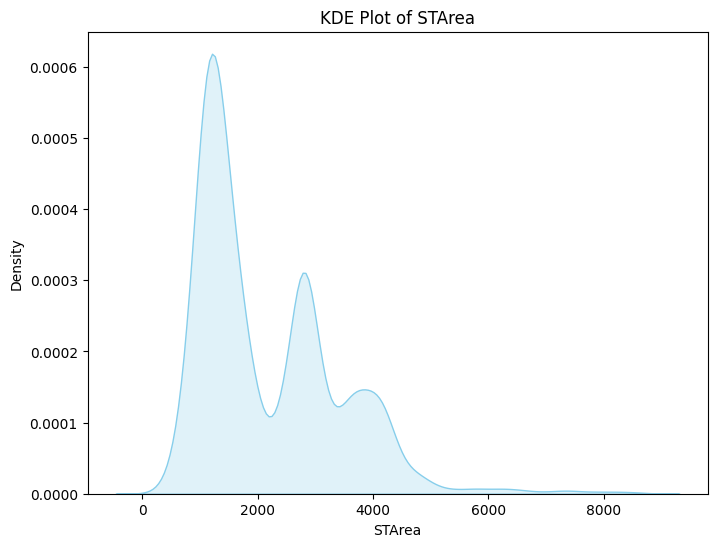

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


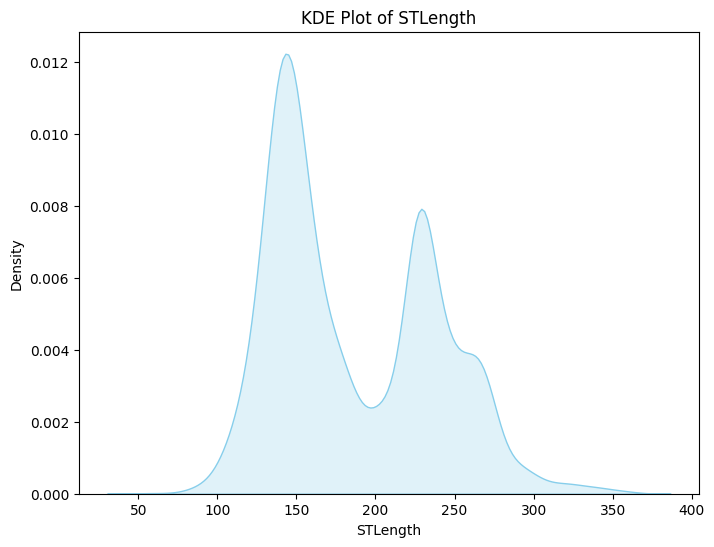

<ipython-input-36-e25bb2d9794b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='skyblue', shade=True)


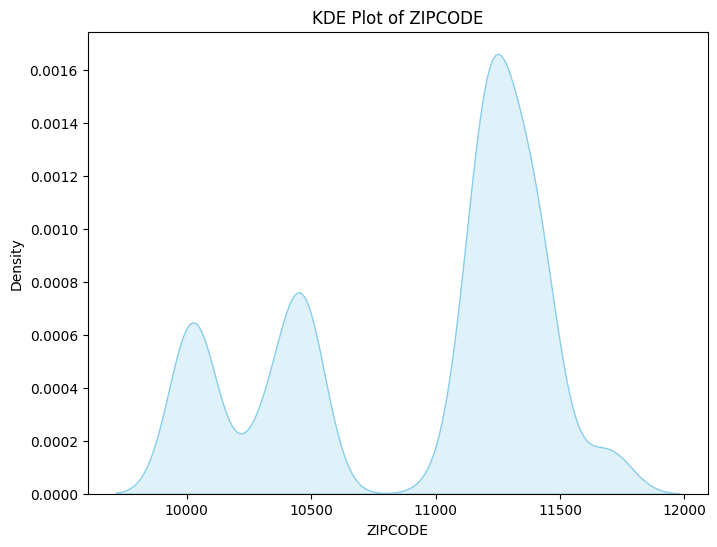

In [36]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df[column], color='skyblue', shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Text(0.5, 1.0, 'Average ZIPCODE value by Primary sport, Separated by BOROUGH')

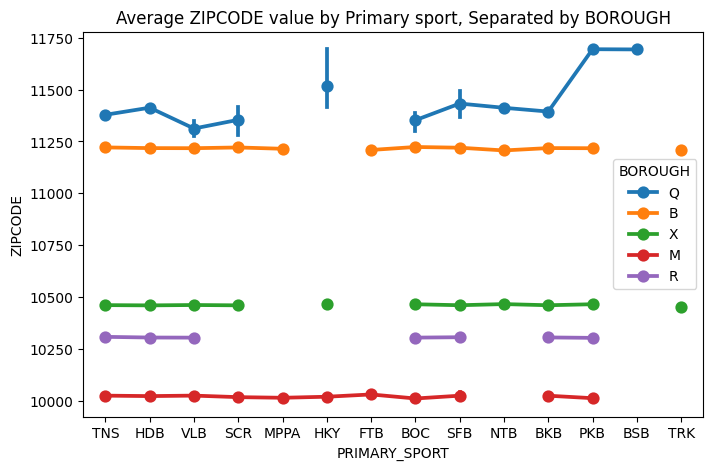

In [37]:
plt.figure(figsize=(8,5))
sns.pointplot(x='PRIMARY_SPORT',y='ZIPCODE',data=df, hue='BOROUGH')
plt.title("Average ZIPCODE value by Primary sport, Separated by BOROUGH")

Text(0.5, 1.0, 'Average PRECINCT value by Primary sport, Separated by BOROUGH')

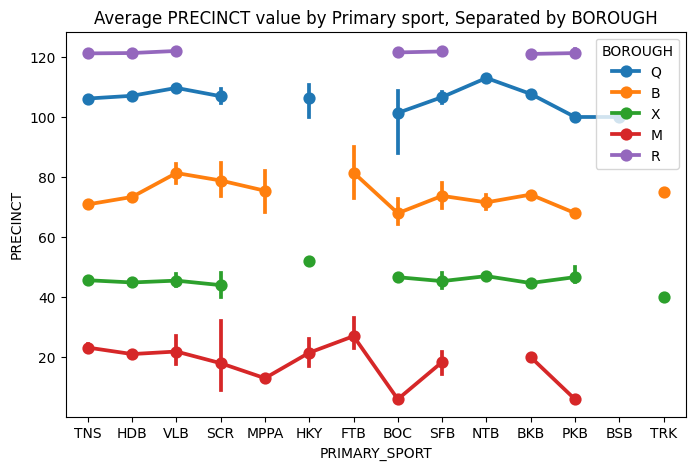

In [38]:
plt.figure(figsize=(8,5))
sns.pointplot(x='PRIMARY_SPORT',y='PRECINCT',data=df, hue='BOROUGH')
plt.title("Average PRECINCT value by Primary sport, Separated by BOROUGH")

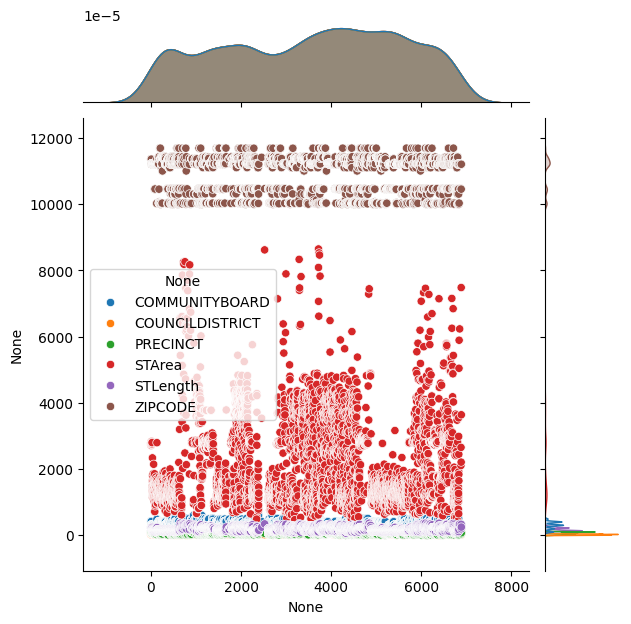

In [39]:
sns.jointplot(df[numerical_cols1])

In [40]:
df[numerical_cols1].corr()

COMMUNITYBOARD  COUNCILDISTRICT  PRECINCT    STArea  \
COMMUNITYBOARD         1.000000         0.641483  0.958462 -0.025417   
COUNCILDISTRICT        0.641483         1.000000  0.545397 -0.023329   
PRECINCT               0.958462         0.545397  1.000000 -0.031942   
STArea                -0.025417        -0.023329 -0.031942  1.000000   
STLength              -0.024020        -0.026060 -0.035289  0.969576   
ZIPCODE                0.760489         0.616753  0.761135 -0.044737   

                 STLength   ZIPCODE  
COMMUNITYBOARD  -0.024020  0.760489  
COUNCILDISTRICT -0.026060  0.616753  
PRECINCT        -0.035289  0.761135  
STArea           0.969576 -0.044737  
STLength         1.000000 -0.045072  
ZIPCODE         -0.045072  1.000000

In [41]:
df[numerical_cols1].skew()

COMMUNITYBOARD    -0.254552
COUNCILDISTRICT   -0.011221
PRECINCT          -0.279320
STArea             1.217969
STLength           0.488693
ZIPCODE           -0.580761
dtype: float64

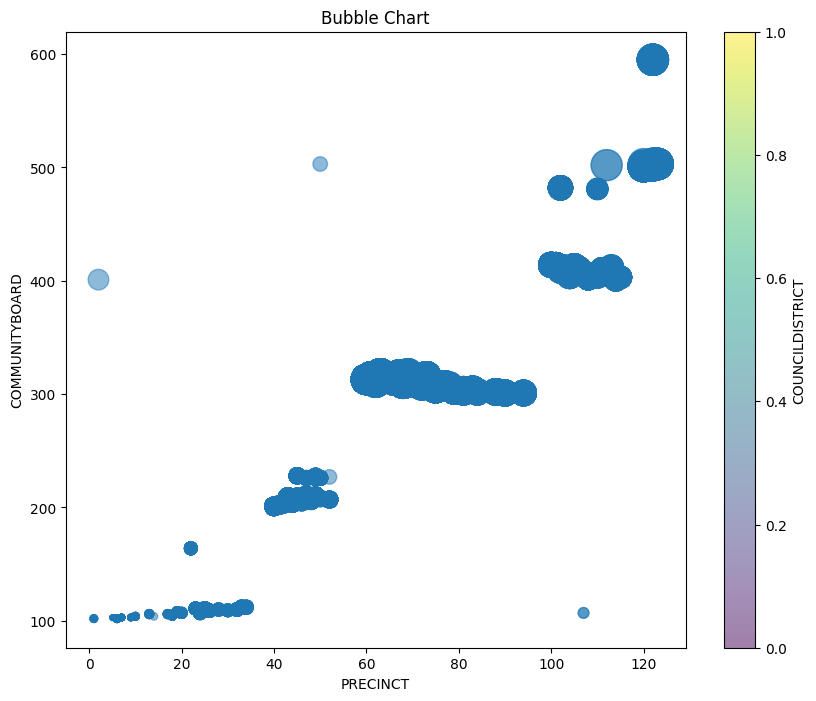

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(df['PRECINCT'], df['COMMUNITYBOARD'], s=df['COUNCILDISTRICT']*10, alpha=0.5)  # Adjust the size for better visualization
plt.xlabel('PRECINCT')
plt.ylabel('COMMUNITYBOARD')
plt.title('Bubble Chart')
plt.colorbar(label='COUNCILDISTRICT')  # Add color bar to show the size variable
plt.show()



---



# Performing some basic problems in our dataset :

**1.) Count of basketball facilities: Get the total count of entries where BASKETBALL is present.**

In [48]:
basketball_count = df['BASKETBALL'].sum()
print("Total count of basketball facilities:", basketball_count)

Total count of basketball facilities: 1498


2.) **Percentage of accessible facilities with basketball**

In [49]:
accessible_basketball_percentage = df[(df['ACCESSIBLE'] == 1) & (df['BASKETBALL'] == 1)].shape[0] / df.shape[0] * 100
print("Percentage of accessible facilities with basketball:", accessible_basketball_percentage)


Percentage of accessible facilities with basketball: 0.01849796522382538


**3.) Facilities with lights and basketball**

In [50]:
lighted_basketball_facilities = df[(df['FIELD_LIGHTED'] == True) & (df['BASKETBALL'] == 1)]
print("Facilities with lights and basketball:\n", lighted_basketball_facilities)


Facilities with lights and basketball:
       ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
964        False           False           False           False        True   
965        False           False           False           False        True   
966        False           False           False           False        True   
967        False           False           False           False        True   
1889       False           False           False           False        True   
...          ...             ...             ...             ...         ...   
4492       False           False           False           False        True   
4537       False           False           False           False        True   
4538       False           False           False           False        True   
4578       False           False           False           False        True   
5870       False           False           False           False        True   


**4.) Which is the most popular sport?**

In [51]:
most_popular_sport = df['PRIMARY_SPORT'].mode()[0]
most_popular_sport_count = df['PRIMARY_SPORT'].value_counts().max()

print("\nMost Popular Sport:", most_popular_sport)
print("Number of Occurrences:", most_popular_sport_count)


Most Popular Sport: HDB
Number of Occurrences: 2159


**5.) Calculate the density of athletic facilities per zipcode**

In [52]:
zipcode_sport_counts = {}

for zipcode in df['ZIPCODE'].unique():
    df_zipcode = df[df['ZIPCODE'] == zipcode]

    sport_counts = {}

    for column in df_zipcode.columns:
        if df_zipcode[column].dtype == bool:
            true_count = df_zipcode[column].sum()
            sport_counts[column] = true_count

    max_sports = [sport for sport, count in sport_counts.items() if count == max(sport_counts.values())]

    zipcode_sport_counts[zipcode] = {"sports": max_sports, "true_count": max(sport_counts.values())}

for zipcode, data in zipcode_sport_counts.items():
    print("ZIP code:", zipcode)
    print("Sport(s) with highest true count:", data["sports"])
    print("True count:", data["true_count"])
    print()


ZIP code: 11361.0
Sport(s) with highest true count: ['TENNIS']
True count: 12

ZIP code: 11209.0
Sport(s) with highest true count: ['HANDBALL']
True count: 17

ZIP code: 11228.0
Sport(s) with highest true count: ['HANDBALL']
True count: 20

ZIP code: 11217.0
Sport(s) with highest true count: ['HANDBALL']
True count: 13

ZIP code: 11201.0
Sport(s) with highest true count: ['HANDBALL']
True count: 29

ZIP code: 11213.0
Sport(s) with highest true count: ['HANDBALL']
True count: 29

ZIP code: 11220.0
Sport(s) with highest true count: ['BASKETBALL']
True count: 22

ZIP code: 11232.0
Sport(s) with highest true count: ['BASKETBALL', 'HANDBALL']
True count: 8

ZIP code: 11203.0
Sport(s) with highest true count: ['HANDBALL']
True count: 20

ZIP code: 11238.0
Sport(s) with highest true count: ['BASKETBALL', 'HANDBALL']
True count: 6

ZIP code: 11225.0
Sport(s) with highest true count: ['BASKETBALL']
True count: 9

ZIP code: 11219.0
Sport(s) with highest true count: ['HANDBALL']
True count: 2

ZI

**6.) Find the sport with the maximum total area and the sport with the maximum total length among active sports, and display their respective total areas and lengths**

In [53]:
active_sports = df[df['FEATURESTATUS'] == 'Active']
result = active_sports.groupby('PRIMARY_SPORT').agg({'STArea': 'sum', 'STLength': 'sum'}).reset_index()
max_area_sport = result.loc[result['STArea'].idxmax()]
max_length_sport = result.loc[result['STLength'].idxmax()]

print("Sport with maximum total STArea (Active):", max_area_sport['PRIMARY_SPORT'], "Total STArea:", max_area_sport['STArea'])
print("Sport with maximum total STLength (Active):", max_length_sport['PRIMARY_SPORT'], "Total STLength:", max_length_sport['STLength'])

Sport with maximum total STArea (Active): BKB Total STArea: 4782239.8940765
Sport with maximum total STLength (Active): BKB Total STLength: 363053.57075475




---



# Encoding of categorical columns of the dataset after removing null values and outliers :

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
df_before_encoded = pd.get_dummies(df, columns=categorical_cols,drop_first = True)

print(df_before_encoded.shape)
print(df_before_encoded.sample(n=10))



Index(['BOROUGH', 'DEPARTMENT', 'DIMENSIONS', 'FEATURESTATUS', 'FIELD_NUMBER',
       'GISPROPNUM', 'PRIMARY_SPORT', 'SURFACE_TYPE', 'SYSTEM'],
      dtype='object')
(5406, 6372)
      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
4166       False           False           False           False        True   
1782       False           False           False           False       False   
246        False           False           False           False       False   
4466       False           False           False           False        True   
1898       False           False           False           False       False   
43         False           False           False           False       False   
3896       False           False           False           False        True   
3835       False           False           False           False        True   
2234       False           False           False           False       False   
5694       False     

In [44]:
print(df_before_encoded.isnull().sum())

ACCESSIBLE                  0
ADULT_BASEBALL              0
ADULT_FOOTBALL              0
ADULT_SOFTBALL              0
BASKETBALL                  0
                           ..
SYSTEM_X344-TENNIS-7        0
SYSTEM_X344-TENNIS-8        0
SYSTEM_X344-TENNIS-9        0
SYSTEM_x214-BASKETBALL-2    0
SYSTEM_x214-BASKETBALL-3    0
Length: 6372, dtype: int64




---



# Standardization of the dataset after removing outliers and null values :

In [46]:
data_types = df.dtypes
numeric_columns = data_types[data_types !='object'].index
numeric_data = df[numeric_columns]
scaler = StandardScaler()
scaled_data_standardized = scaler.fit_transform(numeric_data)
scaled_df_standardized = pd.DataFrame(scaled_data_standardized, columns=numeric_columns)
print("Scaled DataFrame after standardization:")
print(scaled_df_standardized.sample(n=10))

print(scaled_df_standardized.isnull().sum())

Scaled DataFrame after standardization:
      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
1221   -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
1556   -0.019238       -0.023564       -0.019238       -0.072155    1.615182   
5073   -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
4815   -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
4910   -0.019238       -0.023564       -0.019238       -0.072155    1.615182   
68     -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
5133   -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
5279   -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   
4916   -0.019238       -0.023564       -0.019238       -0.072155    1.615182   
987    -0.019238       -0.023564       -0.019238       -0.072155   -0.619125   

         BOCCE  COMMUNITYBOARD  COUNCILDISTRICT   CRICKET  FIELD_LIGHTED  ...  



---



# Normalization of the dataset after removing outliers and null values :

In [47]:
scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(numeric_data)
scaled_df_normalized = pd.DataFrame(scaled_data_normalized, columns=numeric_columns)

print("\nScaled DataFrame after normalization:")
print(scaled_df_normalized.sample(n=10))

print(scaled_df_normalized.isnull().sum())


Scaled DataFrame after normalization:
      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
194          0.0             0.0             0.0             0.0         0.0   
1190         0.0             0.0             0.0             0.0         0.0   
2325         0.0             0.0             0.0             0.0         1.0   
1484         0.0             0.0             0.0             0.0         1.0   
419          0.0             0.0             0.0             0.0         0.0   
115          0.0             0.0             0.0             0.0         0.0   
2471         0.0             0.0             0.0             0.0         1.0   
1680         0.0             0.0             0.0             0.0         0.0   
1507         0.0             0.0             0.0             0.0         1.0   
2469         0.0             0.0             0.0             0.0         1.0   

      BOCCE  COMMUNITYBOARD  COUNCILDISTRICT  CRICKET  FIELD_LIGHTED  ...  \
194



---



# Printing the standardization and normalization

In [54]:
non_numeric_columns = data_types[data_types == 'object'].index
print("Non-numeric columns:")
print(non_numeric_columns)
df_non_numeric = df.drop(columns=numeric_columns)
numeric_data = df[numeric_columns]
numeric_data.reset_index(drop=True, inplace=True)
df_non_numeric.reset_index(drop=True, inplace=True)

# Concatenate df_non_numeric with scaled_df_standardized or scaled_df_normalized
df_scaled_standardized = pd.concat([df_non_numeric, scaled_df_standardized], axis=1)
df_scaled_normalized = pd.concat([df_non_numeric, scaled_df_normalized], axis=1)

Non-numeric columns:
Index(['BOROUGH', 'DEPARTMENT', 'DIMENSIONS', 'FEATURESTATUS', 'FIELD_NUMBER',
       'GISPROPNUM', 'PRIMARY_SPORT', 'SURFACE_TYPE', 'SYSTEM'],
      dtype='object')


In [55]:
print("Scaled DataFrame after standardization:")
print(df_scaled_standardized.sample(n=10))

Scaled DataFrame after standardization:
     BOROUGH DEPARTMENT  DIMENSIONS       FEATURESTATUS FIELD_NUMBER  \
4536       B       B-17    Handball              Active            3   
875        B       B-18      Tennis              Active           11   
1746       B       B-13    Handball              Active            1   
1357       Q       Q-12  Full Court              Active           13   
1580       X       X-13  Full Court              Active            4   
5182       X       X-02      Tennis            Inactive            1   
1449       M       M-14  Full Court              Active            1   
244        Q       Q-13    Handball              Active            1   
471        B       B-03    Handball              Active            4   
1971       B       B-16    Handball  Closed Temporarily           11   

     GISPROPNUM PRIMARY_SPORT SURFACE_TYPE                SYSTEM  ACCESSIBLE  \
4536       B218           HDB      Asphalt       B218-HANDBALL-3   -0.019238   
875    

In [56]:
print("\nScaled DataFrame after normalization:")
print(df_scaled_normalized.sample(n=10))


Scaled DataFrame after normalization:
     BOROUGH DEPARTMENT  DIMENSIONS FEATURESTATUS FIELD_NUMBER GISPROPNUM  \
1148       X      X-15A    Handball        Active            6       X039   
551        B       B-05    Handball        Active            2       B103   
2623       Q       Q-05  Half Court        Active            4      Q360M   
4763       X       X-07  Full Court      Inactive            1       X104   
2864       Q       Q-05  Full Court        Active            3       Q305   
4293       X       X-01    Handball        Active            3       X155   
2877       B       B-18  Full Court        Active            1       B330   
3938       Q       Q-07    Handball        Active            1       Q022   
2957       B       B-09  Full Court        Active            1       B254   
4581       X       X-10    Handball        Active            2       X170   

     PRIMARY_SPORT SURFACE_TYPE                 SYSTEM  ACCESSIBLE  ...  \
1148           HDB      Asphalt  X039-



---



# Showing Sqrt Feature Transformation Technique on STArea

Text(0.5, 1.0, 'Sqrt-transformed STArea Distribution')

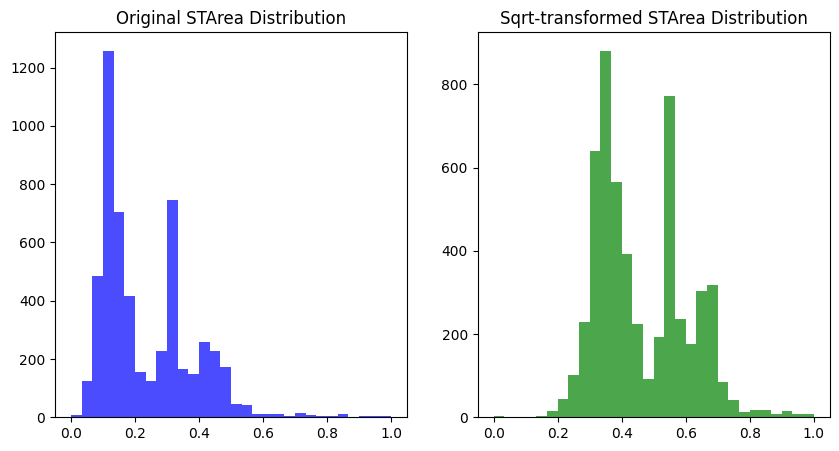

In [57]:
plt.figure(figsize=(10, 5))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df_scaled_normalized['STArea'], bins=30, color='blue', alpha=0.7)
plt.title('Original STArea Distribution')

# Log-transformed distribution
plt.subplot(1, 2, 2)
plt.hist(np.sqrt(df_scaled_normalized['STArea']), bins=30, color='green', alpha=0.7)
plt.title('Sqrt-transformed STArea Distribution')



---



# Encoding after removing the outliers,null values and doing normalization

In [58]:
categorical_cols = df_scaled_normalized.select_dtypes(include=['object']).columns
print(categorical_cols)

df_encoded = pd.get_dummies(df_scaled_normalized, columns=categorical_cols,drop_first = True)

print(df_encoded.shape)
print(df_encoded.sample(n=10))

Index(['BOROUGH', 'DEPARTMENT', 'DIMENSIONS', 'FEATURESTATUS', 'FIELD_NUMBER',
       'GISPROPNUM', 'PRIMARY_SPORT', 'SURFACE_TYPE', 'SYSTEM'],
      dtype='object')
(5406, 6372)
      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
4939         0.0             0.0             0.0             0.0         0.0   
2211         0.0             0.0             0.0             0.0         1.0   
1684         0.0             0.0             0.0             0.0         0.0   
3951         0.0             0.0             0.0             0.0         0.0   
2051         0.0             0.0             0.0             0.0         1.0   
1441         0.0             0.0             0.0             0.0         1.0   
4379         0.0             0.0             0.0             0.0         0.0   
2324         0.0             0.0             0.0             0.0         1.0   
3112         0.0             0.0             0.0             0.0         1.0   
3788         0.0     



---



# Mutual Information Feature Selection Technique (Target Variable --> STArea)

In [59]:
Xtemp = df.drop(columns = ['SYSTEM','GISPROPNUM'])
categorical_cols = Xtemp.select_dtypes(include=['object']).columns
Xtemp_before_encoded = pd.get_dummies(Xtemp, columns=categorical_cols,drop_first = True)
print(Xtemp_before_encoded)


X = Xtemp_before_encoded.drop(columns=['STArea', 'STLength'])
y_area = Xtemp_before_encoded['STArea']
y_length = Xtemp_before_encoded['STLength']
mi_area = mutual_info_regression(X, y_area)
# mi_length = mutual_info_regression(X, y_length)


      ACCESSIBLE  ADULT_BASEBALL  ADULT_FOOTBALL  ADULT_SOFTBALL  BASKETBALL  \
0          False           False           False           False       False   
1          False           False           False           False       False   
2          False           False           False           False       False   
3          False           False           False           False       False   
4          False           False           False           False       False   
...          ...             ...             ...             ...         ...   
6878       False           False           False           False       False   
6880       False           False           False           False       False   
6883       False           False           False           False       False   
6884       False           False           False           False       False   
6887       False           False           False           False       False   

      BOCCE  COMMUNITYBOARD  COUNCILDIS

In [60]:
feature_importance_area = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_STArea': mi_area})

In [61]:
feature_importance_area.sort_values(by='Mutual_Information_STArea', ascending=False, inplace=True)

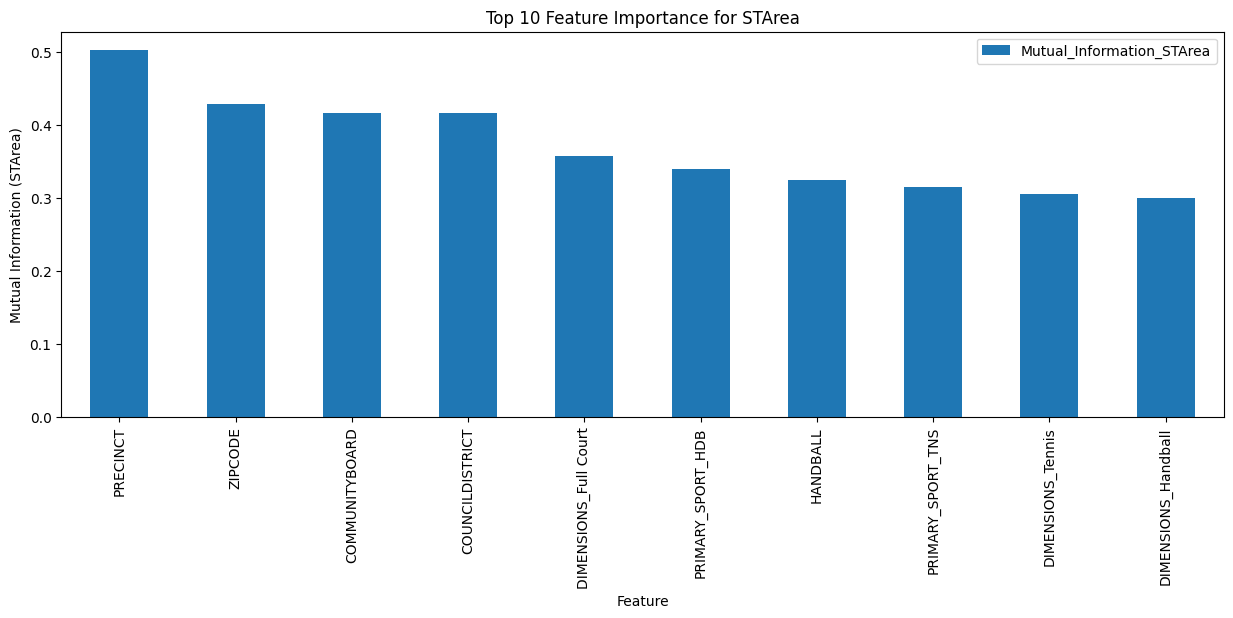

In [62]:
feature_importance_area_sorted = feature_importance_area.sort_values(by='Mutual_Information_STArea', ascending=False)
top_10_features = feature_importance_area_sorted.head(10)
top_10_features.plot.bar(x='Feature', y='Mutual_Information_STArea', figsize=(15, 5))
plt.xlabel('Feature')
plt.ylabel('Mutual Information (STArea)')
plt.title('Top 10 Feature Importance for STArea')
plt.show()


In [63]:
print("Feature Importance for STArea:")
print(feature_importance_area)

Feature Importance for STArea:
                   Feature  Mutual_Information_STArea
22                PRECINCT                   0.502647
32                 ZIPCODE                   0.428848
6           COMMUNITYBOARD                   0.416329
7          COUNCILDISTRICT                   0.415981
111  DIMENSIONS_Full Court                   0.358038
..                     ...                        ...
25                   RUGBY                   0.000000
30      WHEELCHAIRFOOTBALL                   0.000000
208      PRIMARY_SPORT_TRK                   0.000000
0               ACCESSIBLE                   0.000000
218      SURFACE_TYPE_Wood                   0.000000

[219 rows x 2 columns]


In [64]:
## Selecting the top 20 percentile
selected_top_columns_area = SelectPercentile(score_func=mutual_info_regression, percentile=20)
selected_top_columns_area.fit(X, y_area)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x78850359ecb0>)

In [65]:
selected_top_columns_area.get_support()

array([False, False, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False,

In [66]:
X.columns[selected_top_columns_area.get_support()]

Index(['BASKETBALL', 'COMMUNITYBOARD', 'COUNCILDISTRICT', 'FIELD_LIGHTED',
       'HANDBALL', 'LL_SOFTBALL', 'MAINTENANCEAGREEMENT', 'PRECINCT', 'TENNIS',
       'VOLLEYBALL', 'ZIPCODE', 'BOROUGH_M', 'BOROUGH_Q', 'BOROUGH_R',
       'BOROUGH_X', 'DEPARTMENT_B-02', 'DEPARTMENT_B-13', 'DEPARTMENT_B-14',
       'DEPARTMENT_B-18', 'DEPARTMENT_M-11R', 'DEPARTMENT_Q-05',
       'DEPARTMENT_Q-13', 'DEPARTMENT_Q-14', 'DEPARTMENT_Q-15',
       'DEPARTMENT_Q-16', 'DEPARTMENT_R-02', 'DEPARTMENT_X-04',
       'DIMENSIONS_Bocce', 'DIMENSIONS_Full Court', 'DIMENSIONS_Half Court',
       'DIMENSIONS_Handball', 'DIMENSIONS_Tennis', 'DIMENSIONS_Volleyball',
       'FEATURESTATUS_Inactive', 'FIELD_NUMBER_1', 'PRIMARY_SPORT_BOC',
       'PRIMARY_SPORT_HDB', 'PRIMARY_SPORT_SCR', 'PRIMARY_SPORT_SFB',
       'PRIMARY_SPORT_TNS', 'PRIMARY_SPORT_VLB', 'SURFACE_TYPE_Clay',
       'SURFACE_TYPE_Concrete', 'SURFACE_TYPE_Sand'],
      dtype='object')

In [67]:
len(X.columns[selected_top_columns_area.get_support()])

44



---



# Model Fitting for The Selected Features for the target variable STArea

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

# Split the data into training and testing sets
X_selected_area = X[X.columns[selected_top_columns_area.get_support()]]
# print(X_selected_area)
X_train, X_test, y_train, y_test = train_test_split(X_selected_area, y_area, test_size=0.2, random_state=42)


# Logistic Regression can't be applied because the target variable is not continuous
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# logistic_pred = logistic_model.predict(X_test)
# logistic_accuracy = accuracy_score(y_test, logistic_pred)
# print("Logistic Regression Accuracy:", logistic_accuracy)

# Train and evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression : R2 score:", linear_r2)
# print("Linear Regression Mean Squared Error:", linear_mse)

# # Train and evaluate Random Forest Classifier
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
# print("Random Forest Mean Squared Error:", rf_mse)
print(" Random Forest Regression : R2_Score",rf_r2)


Linear Regression : R2 score: 0.6973729153929771
 Random Forest Regression : R2_Score 0.7122734103933517


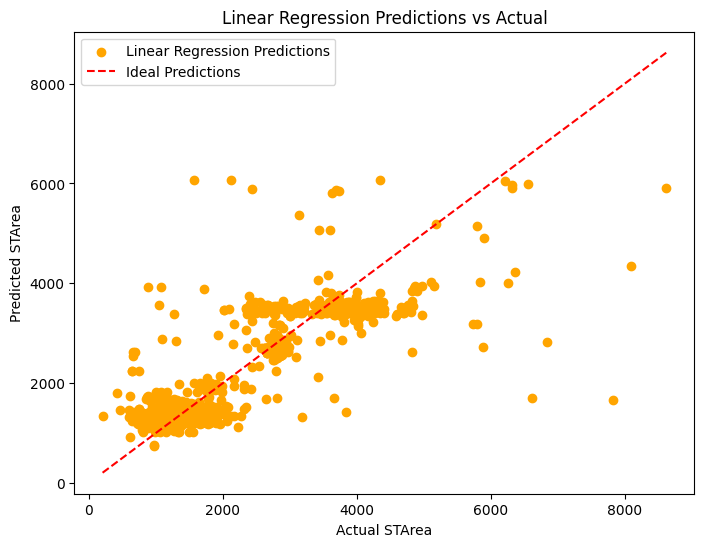

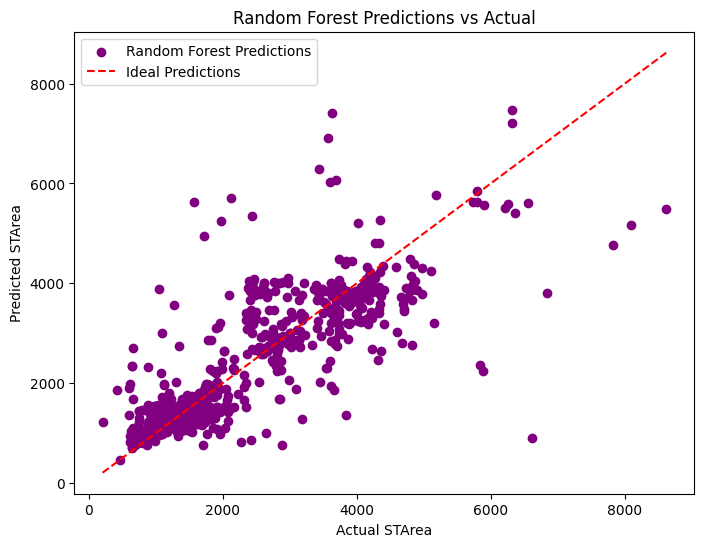

In [69]:
import matplotlib.pyplot as plt


# Plotting Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, color='orange', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual STArea')
plt.ylabel('Predicted STArea')
plt.legend()
plt.show()

# Plotting Random Forest predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='purple', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual STArea')
plt.ylabel('Predicted STArea')
plt.legend()
plt.show()




---



# Variance Thresholding Feature Selection Technique (Target Variable --> STLength)

In [70]:
selector_vt = VarianceThreshold(threshold=0.1)
X_selected_vt = selector_vt.fit_transform(X)

In [71]:
selected_features_vt = X.columns[selector_vt.get_support()]

In [72]:
print("Selected Features after Variance Thresholding:")
print(selected_features_vt)

Selected Features after Variance Thresholding:
Index(['BASKETBALL', 'COMMUNITYBOARD', 'COUNCILDISTRICT', 'HANDBALL',
       'PRECINCT', 'TENNIS', 'ZIPCODE', 'BOROUGH_M', 'BOROUGH_Q', 'BOROUGH_X',
       'DIMENSIONS_Full Court', 'DIMENSIONS_Half Court', 'DIMENSIONS_Handball',
       'DIMENSIONS_Tennis', 'FIELD_NUMBER_1', 'FIELD_NUMBER_2',
       'FIELD_NUMBER_3', 'PRIMARY_SPORT_HDB', 'PRIMARY_SPORT_TNS'],
      dtype='object')


In [73]:
len(X.columns[selector_vt.get_support()])

19



---



Model Fitting (Regression) for the selected features for the target variable STLength

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

# Split the data into training and testing sets
X_selected_length = X[X.columns[selector_vt.get_support()]]
# print(X_selected_area)
X_train, X_test, y_train, y_test = train_test_split(X_selected_length, y_length, test_size=0.2, random_state=42)


# Logistic Regression can't be applied because the target variable is not continuous
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# logistic_pred = logistic_model.predict(X_test)
# logistic_accuracy = accuracy_score(y_test, logistic_pred)
# print("Logistic Regression Accuracy:", logistic_accuracy)

# Train and evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression : R2 score:", linear_r2)
# print("Linear Regression Mean Squared Error:", linear_mse)

# # Train and evaluate Random Forest Classifier
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
# print("Random Forest Mean Squared Error:", rf_mse)
print(" Random Forest Regression : R2_Score",rf_r2)


Linear Regression : R2 score: 0.7105962149189431
 Random Forest Regression : R2_Score 0.7312292946899344


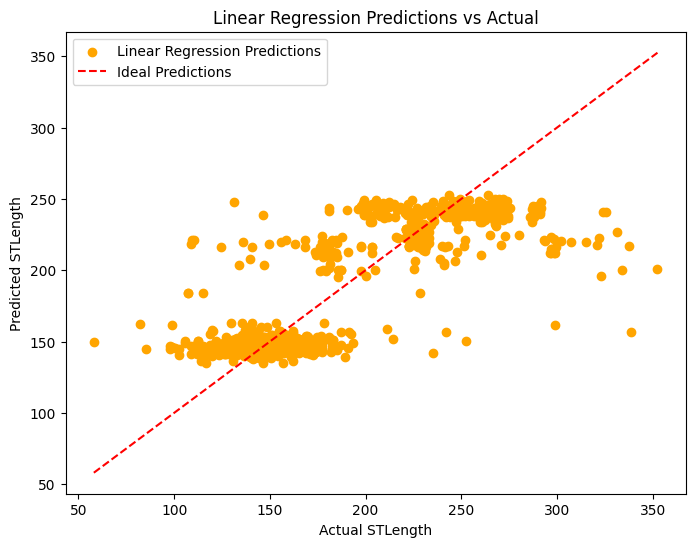

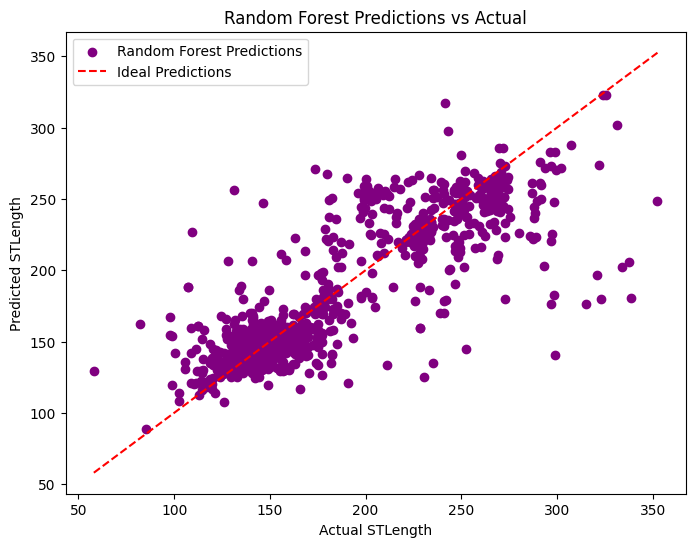

In [76]:
import matplotlib.pyplot as plt


# Plotting Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, color='orange', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual STLength')
plt.ylabel('Predicted STLength')
plt.legend()
plt.show()

# Plotting Random Forest predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='purple', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Predictions')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual STLength')
plt.ylabel('Predicted STLength')
plt.legend()
plt.show()




---



# Model Fitting(Classification) for the target varibale BASKETBALL

In [77]:
from sklearn.metrics import roc_curve, auc
target_variable = 'BASKETBALL'
X = df_encoded.drop(target_variable, axis=1)
y = df_encoded[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering (You can add more feature engineering steps here)

# Feature Selection (You can add feature selection techniques here)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1 Score': f1}

for model_name, scores in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {scores['Accuracy']:.4f}")
    print(f"Precision: {scores['Precision']:.4f}")
    print(f"Recall: {scores['Recall']:.4f}")
    print(f"F1 Score: {scores['F1 Score']:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.9723
Precision: 0.9262
Recall: 0.9718
F1 Score: 0.9485

Model: Random Forest Classifier
Accuracy: 0.9723
Precision: 0.9291
Recall: 0.9683
F1 Score: 0.9483

Model: Support Vector Machine
Accuracy: 0.9695
Precision: 0.9169
Recall: 0.9718
F1 Score: 0.9436





---

